### Data Download, Pre Processing and EDA 

In [1]:

!pip install pandas

# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import metatata file containing particpants info and clinical interviews outcome 
metadata = pd.read_csv('metadata_mapped.csv')

In [2]:
# Create a new column for the sum of the binary outcomes for PHQ and PCL-C

metadata['sum'] = metadata['PHQ_Binary'] + metadata['PCL-C (PTSD)']

In [3]:
metadata['name'] = metadata['Participant_ID']

In [4]:
metadata.head()

Participant_ID AVECParticipant_ID  Gender  PHQ_Binary  PHQ_Score  \
0             302       training_001    male           0          4   
1             303       training_002  female           0          0   
2             304       training_003  female           0          6   
3             305       training_004    male           0          7   
4             307       training_005  female           0          4   

   PCL-C (PTSD)  PTSD Severity  sum  name  
0             0             28    0   302  
1             0             17    0   303  
2             0             20    0   304  
3             0             28    0   305  
4             0             23    0   307

In [5]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Participant_ID      219 non-null    int64 
 1   AVECParticipant_ID  219 non-null    object
 2   Gender              219 non-null    object
 3   PHQ_Binary          219 non-null    int64 
 4   PHQ_Score           219 non-null    int64 
 5   PCL-C (PTSD)        219 non-null    int64 
 6   PTSD Severity       219 non-null    int64 
 7   sum                 219 non-null    int64 
 8   name                219 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 15.5+ KB


#### Participants Distribution Visualization

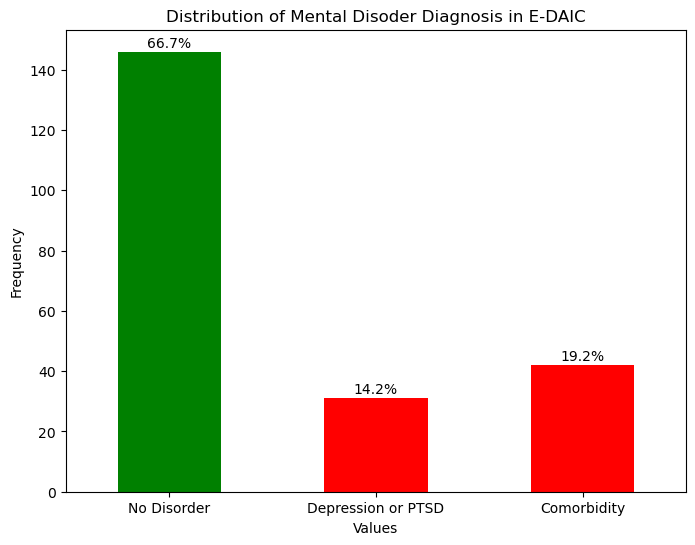

sum
0    146
1     31
2     42
Name: count, dtype: int64


In [6]:
!pip install pandas matplotlib numpy

# import matplotlib for visulaization task
import matplotlib.pyplot as plt

# import numpy for numerical operations
import numpy as np

mental_disorder_groups = metadata['sum'].value_counts().sort_index()

# Create bar plot
labels = ['No Disorder', 'Depression or PTSD', 'Comorbidity']
percentage_distribution = (mental_disorder_groups / mental_disorder_groups.sum()) * 100


colors = ['green'] + ['red'] * (len(mental_disorder_groups) - 1)

plt.figure(figsize=(8, 6))
mental_disorder_groups.plot(kind='bar', color=colors)
plt.title('Distribution of Mental Disoder Diagnosis in E-DAIC')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)

for i, (count, percentage) in enumerate(zip(mental_disorder_groups, percentage_distribution)):
    plt.text(i, count + 0.5, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()
print(mental_disorder_groups)


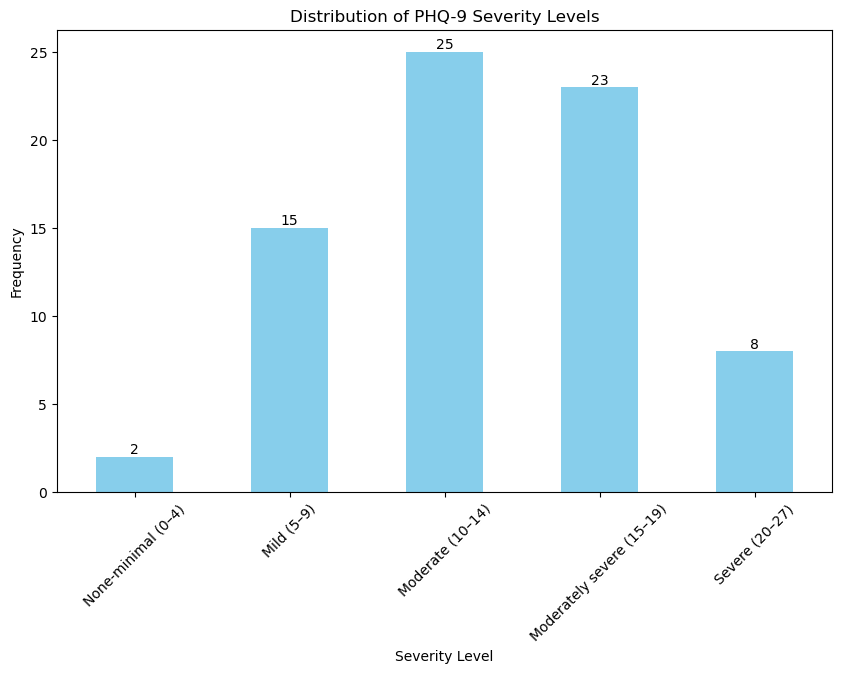

severity
None-minimal (0–4)            2
Mild (5–9)                   15
Moderate (10–14)             25
Moderately severe (15–19)    23
Severe (20–27)                8
Name: count, dtype: int64


In [7]:
# Define the severity categories
disorder_severity = metadata[(metadata['sum'] > 0)].copy()
bins = [0, 4, 9, 14, 19, 27]
labels = ['None-minimal (0–4)', 'Mild (5–9)', 'Moderate (10–14)', 'Moderately severe (15–19)', 'Severe (20–27)']

# Assign categories based on the severity thresholds
disorder_severity.loc[:, 'severity'] = pd.cut(disorder_severity['PHQ_Score'], bins=bins, labels=labels, right=True)

# Calculate the frequency distribution
frequency_distribution = disorder_severity['severity'].value_counts().sort_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
ax = frequency_distribution.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Distribution of PHQ-9 Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')

# Set x-ticks to match the categories
ax.set_xticklabels(frequency_distribution.index, rotation=45)

# Adding count annotations to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

# Print frequency distribution
print(frequency_distribution)


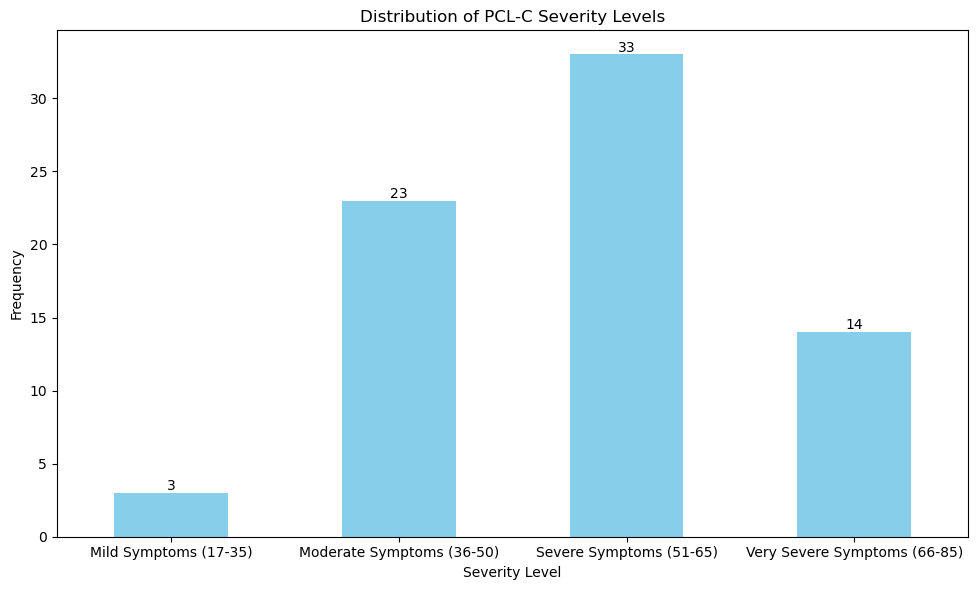

severity
Mild Symptoms (17-35)            3
Moderate Symptoms (36-50)       23
Severe Symptoms (51-65)         33
Very Severe Symptoms (66-85)    14
Name: count, dtype: int64


In [8]:
# Define the severity categories
disorder_severity = metadata[(metadata['sum'] > 0)].copy()
bins = [17, 35, 50, 65, 85]
labels = ['Mild Symptoms (17-35)', 'Moderate Symptoms (36-50)', 'Severe Symptoms (51-65)', 'Very Severe Symptoms (66-85)']

# Assign categories based on the severity thresholds
disorder_severity.loc[:, 'severity'] = pd.cut(disorder_severity['PTSD Severity'], bins=bins, labels=labels, right=True)

# Calculate the frequency distribution
frequency_distribution = disorder_severity['severity'].value_counts().sort_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
ax = frequency_distribution.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Distribution of PCL-C Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')

# Set x-ticks to match the categories
ax.set_xticklabels(frequency_distribution.index, rotation=0)

# Adding count annotations to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.tight_layout()
plt.show()

# Print frequency distribution
print(frequency_distribution)


In [9]:
disorder_severity.head()

Participant_ID AVECParticipant_ID  Gender  PHQ_Binary  PHQ_Score  \
5              308       training_006  female           1         22   
6              309       training_007    male           1         15   
8              311       training_009  female           1         21   
15             319       training_016    male           1         13   
24             330       training_025    male           1         12   

    PCL-C (PTSD)  PTSD Severity  sum  name                      severity  
5              1             67    2   308  Very Severe Symptoms (66-85)  
6              1             74    2   309  Very Severe Symptoms (66-85)  
8              1             70    2   311  Very Severe Symptoms (66-85)  
15             1             53    2   319       Severe Symptoms (51-65)  
24             1             46    2   330     Moderate Symptoms (36-50)

#### Data Download from E-DAIC

In [10]:
# Filtering for data of individuals with mental disorders sum > 0 from code line 2

data_list = metadata.loc[(metadata['sum']>0), 'Participant_ID']
data_list= data_list.tolist()

In [11]:
# TO DOWNLOAD NECCESSARY FILES FROM ARCHIVE

# Install necessary libraries
!pip install requests

# for interacting with the operating system
import os

# for sending HTTP requests and handling responses
import requests

# Changing suffix to match style in filename in archive
file_names = [str(item) + '_P' for item in data_list]

# Base URL of the web directory
base_url = "https://dcapswoz.ict.usc.edu/wwwedaic/data/"

# Local folder containing files "PLEASE CHANGE TO ONE DRIVE DIRECTORY AS AVAILABLE ON LOCAL"
local_folder = r"C:\Users\Admin\OneDrive - University of Derby\EDAIC Patient files"

# Ensure the local folder exists
os.makedirs(local_folder, exist_ok=True)

# Function to download a file
def download_file(file_name):
    url = f"{base_url}{file_name}.tar"
    local_path = os.path.join(local_folder, f"{file_name}.tar")
    
    if os.path.exists(local_path):
        print(f"File already exists, skipping download: {file_name}.tar")
        return
    
    response = requests.get(url, stream=True)
    
    if response.status_code == 200:
        with open(local_path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        print(f"Downloaded: {file_name}.tar")
    else:
        print(f"Failed to download: {file_name}.tar (Status code: {response.status_code})")

# Download the files
for file_name in file_names:
    download_file(file_name)


File already exists, skipping download: 308_P.tar
File already exists, skipping download: 309_P.tar
File already exists, skipping download: 311_P.tar
File already exists, skipping download: 319_P.tar
File already exists, skipping download: 330_P.tar
File already exists, skipping download: 332_P.tar
File already exists, skipping download: 337_P.tar
File already exists, skipping download: 338_P.tar
File already exists, skipping download: 339_P.tar
File already exists, skipping download: 345_P.tar
File already exists, skipping download: 346_P.tar
File already exists, skipping download: 348_P.tar
File already exists, skipping download: 351_P.tar
File already exists, skipping download: 353_P.tar
File already exists, skipping download: 354_P.tar
File already exists, skipping download: 355_P.tar
File already exists, skipping download: 356_P.tar
File already exists, skipping download: 359_P.tar
File already exists, skipping download: 362_P.tar
File already exists, skipping download: 367_P.tar


In [12]:
# TO EXTRACT .tar ZIP FILE


# for reading and writing .tar archive files
import tarfile

# Function to extract .tar files
def extract_tar(file_path, extract_to):
    with tarfile.open(file_path, 'r') as tar:
        tar.extractall(path=extract_to)

# Process each .tar file
for file_name in file_names:
    tar_path = os.path.join(local_folder, f"{file_name}.tar")
    extract_path = os.path.join(local_folder, file_name)
    
    # Check if the extract path already exists
    if os.path.exists(extract_path):
        print(f"Skipping extraction for {file_name} as it already exists.")
        continue
    
    # Extract the .tar file
    extract_tar(tar_path, extract_path)

print("Task completed.")


Skipping extraction for 308_P as it already exists.
Skipping extraction for 309_P as it already exists.
Skipping extraction for 311_P as it already exists.
Skipping extraction for 319_P as it already exists.
Skipping extraction for 330_P as it already exists.
Skipping extraction for 332_P as it already exists.
Skipping extraction for 337_P as it already exists.
Skipping extraction for 338_P as it already exists.
Skipping extraction for 339_P as it already exists.
Skipping extraction for 345_P as it already exists.
Skipping extraction for 346_P as it already exists.
Skipping extraction for 348_P as it already exists.
Skipping extraction for 351_P as it already exists.
Skipping extraction for 353_P as it already exists.
Skipping extraction for 354_P as it already exists.
Skipping extraction for 355_P as it already exists.
Skipping extraction for 356_P as it already exists.
Skipping extraction for 359_P as it already exists.
Skipping extraction for 362_P as it already exists.
Skipping ext

### Part 1: Audio Features Analysis

In [13]:
# TO EXTRACT AUDIO FILES FROM THE DOWNLOADED FOLDERS

# for copying, moving, and deleting files and directories
import shutil

# Folder to save the extracted audio files
output_folder = os.path.join(local_folder, "extracted_audios")
os.makedirs(output_folder, exist_ok=True)

# Process each extracted folder
for file_name in file_names:
    if os.path.exists(local_folder):
        # Find WAV files containing "AUDIO"
        for root, dirs, files in os.walk(local_folder):
            for file in files:
                if "audio" in file.lower() and file.endswith(".wav"):
                    wav_path = os.path.join(root, file)
                    destination_path = os.path.join(output_folder, file)
                    
                    # Check if the WAV file already exists in the output folder
                    if os.path.exists(destination_path):
                        print(f"Skipping {wav_path}, as it already exists in {output_folder}")
                        continue
                    
                    # Copy the WAV file to the output folder
                    shutil.copy(wav_path, output_folder)
                    print(f"Copied {wav_path} to {output_folder}")

print("Task completed.")

Skipping C:\Users\Admin\OneDrive - University of Derby\Independent Scholarship one drive\EDAIC Patient files\308_P\308_P\308_AUDIO.wav, as it already exists in C:\Users\Admin\OneDrive - University of Derby\Independent Scholarship one drive\EDAIC Patient files\extracted_audios
Skipping C:\Users\Admin\OneDrive - University of Derby\Independent Scholarship one drive\EDAIC Patient files\309_P\309_P\309_AUDIO.wav, as it already exists in C:\Users\Admin\OneDrive - University of Derby\Independent Scholarship one drive\EDAIC Patient files\extracted_audios
Skipping C:\Users\Admin\OneDrive - University of Derby\Independent Scholarship one drive\EDAIC Patient files\311_P\311_P\311_AUDIO.wav, as it already exists in C:\Users\Admin\OneDrive - University of Derby\Independent Scholarship one drive\EDAIC Patient files\extracted_audios
Skipping C:\Users\Admin\OneDrive - University of Derby\Independent Scholarship one drive\EDAIC Patient files\317_P\317_P\317_AUDIO.wav, as it already exists in C:\Users\

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [14]:

!pip install opensmile

# for feature extraction from audio signals using the OpenSMILE toolkit
import opensmile

# Initialize the opensmile.Smile object with specific feature extraction settings
# `feature_set` specifies the set of features to be extracted; eGeMAPSv02
# `feature_level` determines the level of detail; Functionals for aggregated features will be extracted
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)
smile.feature_names

['F0semitoneFrom27.5Hz_sma3nz_amean',
 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
 'loudness_sma3_amean',
 'loudness_sma3_stddevNorm',
 'loudness_sma3_percentile20.0',
 'loudness_sma3_percentile50.0',
 'loudness_sma3_percentile80.0',
 'loudness_sma3_pctlrange0-2',
 'loudness_sma3_meanRisingSlope',
 'loudness_sma3_stddevRisingSlope',
 'loudness_sma3_meanFallingSlope',
 'loudness_sma3_stddevFallingSlope',
 'spectralFlux_sma3_amean',
 'spectralFlux_sma3_stddevNorm',
 'mfcc1_sma3_amean',
 'mfcc1_sma3_stddevNorm',
 'mfcc2_sma3_amean',
 'mfcc2_sma3_stddevNorm',
 'mfcc3_sma3_amean',
 'mfcc3_sma3_stddevNorm',
 'mfcc4_

In [15]:
# TO EXTRACT THE eGeMAPS openSMILE AUDIO FEATURES

file_names_audio = [file_name.replace('_P', '_AUDIO') for file_name in file_names]

# Empty dataframe specified to hold all features
audio_features_df = pd.DataFrame()

# Iterate through the list of file names
for file_name in file_names_audio:
    file_path = os.path.join(output_folder, f"{file_name}.wav")
    
    try:
        # Extract using smile initialised from above code line features
        features = smile.process_file(file_path)
        
        # Set the index to the file name
        features.index = [file_name]
        
        # Append to the main dataframe
        audio_features_df = pd.concat([audio_features_df, features])
        
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

In [16]:
audio_features_df.head()

F0semitoneFrom27.5Hz_sma3nz_amean  \
308_AUDIO                          32.723549   
309_AUDIO                          26.177670   
311_AUDIO                          33.065254   
319_AUDIO                          22.630255   
330_AUDIO                          20.703571   

           F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
308_AUDIO                                0.157179   
309_AUDIO                                0.136307   
311_AUDIO                                0.091572   
319_AUDIO                                0.178361   
330_AUDIO                                0.172333   

           F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
308_AUDIO                                   31.158361   
309_AUDIO                                   24.870773   
311_AUDIO                                   31.615396   
319_AUDIO                                   19.428164   
330_AUDIO                                   18.268164   

           F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
308_AUDIO                                   32.999187   
309_AUDIO                                   25.677292   
311_AUDIO                                   32.965317   
319_AUDIO                                   21.730726   
330_AUDIO                                   19.923750   

           F0semitoneFrom27.5Hz_sma3nz_percentile80.0  \
308_AUDIO                                   35.998890   
309_AUDIO                                   26.887632   
311_AUDIO                                   34.623825   
319_AUDIO                                   25.723780   
330_AUDIO                                   22.428022   

           F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2  \
308_AUDIO                                  4.840528   
309_AUDIO                                  2.016859   
311_AUDIO                                  3.008429   
319_AUDIO                                  6.295616   
330_AUDIO                                  4.159859   

           F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope  \
308_AUDIO                                   333.690063   
309_AUDIO                                   284.091492   
311_AUDIO                                   177.246460   
319_AUDIO                                   152.895645   
330_AUDIO                                   114.159813   

           F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope  \
308_AUDIO                                     444.399872   
309_AUDIO                                     410.144043   
311_AUDIO                                     264.923004   
319_AUDIO                                     297.997009   
330_AUDIO                                     226.122757   

           F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope  \
308_AUDIO                                    102.101089   
309_AUDIO                                     66.113731   
311_AUDIO                                     48.000790   
319_AUDIO                                     33.888645   
330_AUDIO                                    139.632477   

           F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope  ...  \
308_AUDIO                                      202.492157  ...   
309_AUDIO                                      158.069977  ...   
311_AUDIO                                       80.990501  ...   
319_AUDIO                                       70.846710  ...   
330_AUDIO                                      683.001404  ...   

           slopeUV0-500_sma3nz_amean  slopeUV500-1500_sma3nz_amean  \
308_AUDIO                  -0.012941                     -0.014065   
309_AUDIO                  -0.026146                      0.016269   
311_AUDIO                  -0.018486                      0.017530   
319_AUDIO                  -0.010540                      0.019068   
330_AUDIO                  -0.008701                      0.016318   

           spectralFluxUV_sma3nz_amean  loudnessPeaksPerSec  \
308_AUDIO                     0.124393             0.270865   
309_AUDIO                     0.01

In [17]:
audio_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 308_AUDIO to 698_AUDIO
Data columns (total 88 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   F0semitoneFrom27.5Hz_sma3nz_amean               73 non-null     float32
 1   F0semitoneFrom27.5Hz_sma3nz_stddevNorm          73 non-null     float32
 2   F0semitoneFrom27.5Hz_sma3nz_percentile20.0      73 non-null     float32
 3   F0semitoneFrom27.5Hz_sma3nz_percentile50.0      73 non-null     float32
 4   F0semitoneFrom27.5Hz_sma3nz_percentile80.0      73 non-null     float32
 5   F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2        73 non-null     float32
 6   F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope     73 non-null     float32
 7   F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope   73 non-null     float32
 8   F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope    73 non-null     float32
 9   F0semitoneFrom27.5Hz_sma3nz_stddevF

In [18]:
 # Create dummy variable for identity ID: 'name', to serve as join key

if 'name' not in audio_features_df.columns:
    audio_features_df['name'] = audio_features_df.index.str[:3].astype(int)

In [19]:
# Merge audio feature with paticipants identity features from the metadata

df_all_features = pd.merge(audio_features_df, metadata, on='name', how='left')

In [20]:
df_all_features.index = df_all_features['name']

In [21]:
df_all_features.head()

F0semitoneFrom27.5Hz_sma3nz_amean  \
name                                      
308                           32.723549   
309                           26.177670   
311                           33.065254   
319                           22.630255   
330                           20.703571   

      F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
name                                           
308                                 0.157179   
309                                 0.136307   
311                                 0.091572   
319                                 0.178361   
330                                 0.172333   

      F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
name                                               
308                                    31.158361   
309                                    24.870773   
311                                    31.615396   
319                                    19.428164   
330                                    18.268164   

      F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
name                                               
308                                    32.999187   
309                                    25.677292   
311                                    32.965317   
319                                    21.730726   
330                                    19.923750   

      F0semitoneFrom27.5Hz_sma3nz_percentile80.0  \
name                                               
308                                    35.998890   
309                                    26.887632   
311                                    34.623825   
319                                    25.723780   
330                                    22.428022   

      F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2  \
name                                             
308                                   4.840528   
309                                   2.016859   
311                                   3.008429   
319                                   6.295616   
330                                   4.159859   

      F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope  \
name                                                
308                                    333.690063   
309                                    284.091492   
311                                    177.246460   
319                                    152.895645   
330                                    114.159813   

      F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope  \
name                                                  
308                                      444.399872   
309                                      410.144043   
311                                      264.923004   
319                                      297.997009   
330                                      226.122757   

      F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope  \
name                                                 
308                                     102.101089   
309                                      66.113731   
311                                      48.000790   
319                                      33.888645   
330                                     139.632477   

      F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope  ...  \
name                                                  ...   
308                                       202.492157  ...   
309                                       158.069977  ...   
311                                        80.990501  ...   
319                                        70.846710  ...   
330                                       683.001404  ...   

      equivalentSoundLevel_dBp  name  Participant_ID  AVECParticipant_ID  \
name                                                                       
308                 -29.884073   308             308        training_006   
309                 -36.834705   309             309        training_007   
311                 -49.385475   311             311

In [22]:
# Defining function to assign values based on conditions

def assign_status(row):
    if row['PHQ_Binary'] == 1 and row['PCL-C (PTSD)'] == 0:
        return 'Depression'
    elif row['PCL-C (PTSD)'] == 1 and row['PHQ_Binary'] == 0:
        return 'PTSD'
    elif row['PCL-C (PTSD)'] == 1 and row['PHQ_Binary'] == 1:
        return 'Comorbidity'
    else:
        return 'Unknown'

# Apply the function to create the 'Status' column
df_all_features['Status'] = df_all_features.apply(assign_status, axis=1)

# Display the updated DataFrame
df_all_features

F0semitoneFrom27.5Hz_sma3nz_amean  \
name                                      
308                           32.723549   
309                           26.177670   
311                           33.065254   
319                           22.630255   
330                           20.703571   
...                                 ...   
441                           26.493536   
448                           26.428324   
617                           23.480000   
687                           23.539598   
698                           25.869934   

      F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
name                                           
308                                 0.157179   
309                                 0.136307   
311                                 0.091572   
319                                 0.178361   
330                                 0.172333   
...                                      ...   
441                                 0.108607   
448                                 0.125423   
617                                 0.121891   
687                                 0.229147   
698                                 0.125680   

      F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
name                                               
308                                    31.158361   
309                                    24.870773   
311                                    31.615396   
319                                    19.428164   
330                                    18.268164   
...                                          ...   
441                                    24.777719   
448                                    23.885567   
617                                    21.974827   
687                                    20.958181   
698                                    23.970490   

      F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
name                                               
308                                    32.999187   
309                                    25.677292   
311                                    32.965317   
319                                    21.730726   
330                                    19.923750   
...                                          ...   
441                                    26.383448   
448                                    26.003368   
617                                    22.714563   
687                                    22.284754   
698                                    25.663513   

      F0semitoneFrom27.5Hz_sma3nz_percentile80.0  \
name                                               
308                                    35.998890   
309                                    26.887632   
311                                    34.623825   
319                                    25.723780   
330                                    22.428022   
...                                          ...   
441                                    28.129623   
448                                    28.517906   
617                                    24.361084   
687                                    24.145555   
698                                    27.813274   

      F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2  \
name                                             
308                                   4.840528   
309                                   2.016859   
311                                   3.008429   
319                                   6.295616   
330                                   4.159859   
...                                        ...   
441                                   3.351904   
448                                   4.632339   
617                                   2.386257   
687                                   3.187374   
698                                   3.842785   

      F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope  \
name                                                
308                              

In [23]:
df_all_features.head()

F0semitoneFrom27.5Hz_sma3nz_amean  \
name                                      
308                           32.723549   
309                           26.177670   
311                           33.065254   
319                           22.630255   
330                           20.703571   

      F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
name                                           
308                                 0.157179   
309                                 0.136307   
311                                 0.091572   
319                                 0.178361   
330                                 0.172333   

      F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
name                                               
308                                    31.158361   
309                                    24.870773   
311                                    31.615396   
319                                    19.428164   
330                                    18.268164   

      F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
name                                               
308                                    32.999187   
309                                    25.677292   
311                                    32.965317   
319                                    21.730726   
330                                    19.923750   

      F0semitoneFrom27.5Hz_sma3nz_percentile80.0  \
name                                               
308                                    35.998890   
309                                    26.887632   
311                                    34.623825   
319                                    25.723780   
330                                    22.428022   

      F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2  \
name                                             
308                                   4.840528   
309                                   2.016859   
311                                   3.008429   
319                                   6.295616   
330                                   4.159859   

      F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope  \
name                                                
308                                    333.690063   
309                                    284.091492   
311                                    177.246460   
319                                    152.895645   
330                                    114.159813   

      F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope  \
name                                                  
308                                      444.399872   
309                                      410.144043   
311                                      264.923004   
319                                      297.997009   
330                                      226.122757   

      F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope  \
name                                                 
308                                     102.101089   
309                                      66.113731   
311                                      48.000790   
319                                      33.888645   
330                                     139.632477   

      F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope  ...  name  \
name                                                  ...         
308                                       202.492157  ...   308   
309                                       158.069977  ...   309   
311                                        80.990501  ...   311   
319                                        70.846710  ...   319   
330                                       683.001404  ...   330   

      Participant_ID  AVECParticipant_ID  Gender  PHQ_Binary  PHQ_Score  \
name                                                                      
308              308        training_006  female           1         22   
309              309        training_007    male           1         15   
311           

In [24]:
# Print sample size of mental disorder: single disorders sum = 1 and comorbidity sum = 2

(df_all_features['sum']).value_counts()

sum
2    42
1    31
Name: count, dtype: int64

In [25]:
# To exclude non-feature columns, dtype is converted to string

non_audio_features = [['name', 'Participant_ID', 'PHQ_Binary', 'PHQ_Score', 'PCL-C (PTSD)', 'PTSD Severity', 'sum']]
for col in non_audio_features:
    df_all_features[col] = df_all_features[col].astype(str)

##### Shapiro Test for Normality Audio Features

In [26]:
# Install the scipy library
!pip install scipy

from scipy.stats import shapiro

# including only numerical variables 
num_columns_shapiro = df_all_features.select_dtypes(include=['number'])

# Initialize counters for normally distributed and non-normally distributed features
normal_count = 0
non_normal_count = 0

# Threshold for significance level
alpha = 0.05

# Perform Shapiro-Wilk test for each numerical column
for col in num_columns_shapiro.columns:
    stat, p = shapiro(num_columns_shapiro[col])
    print(f'{col} - Statistics={stat}, p={p}')
    
    # Check if p-value is greater than alpha (0.05), which indicates normal distribution
    if p > alpha:
        normal_count += 1
    else:
        non_normal_count += 1

# Print the counts
print('---------------------------------------------------------------')
print(f'Number of normal features: {normal_count}')
print(f'Number of non-normal features: {non_normal_count}')


F0semitoneFrom27.5Hz_sma3nz_amean - Statistics=0.9540773034095764, p=0.009657511487603188
F0semitoneFrom27.5Hz_sma3nz_stddevNorm - Statistics=0.9391549229621887, p=0.0015748796286061406
F0semitoneFrom27.5Hz_sma3nz_percentile20.0 - Statistics=0.9509276151657104, p=0.00649584736675024
F0semitoneFrom27.5Hz_sma3nz_percentile50.0 - Statistics=0.947243869304657, p=0.004123581573367119
F0semitoneFrom27.5Hz_sma3nz_percentile80.0 - Statistics=0.9530177116394043, p=0.008444428443908691
F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2 - Statistics=0.9730326533317566, p=0.11919697374105453
F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope - Statistics=0.8922473192214966, p=1.343386793450918e-05
F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope - Statistics=0.8676727414131165, p=1.6894704231162905e-06
F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope - Statistics=0.9760449528694153, p=0.178572878241539
F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope - Statistics=0.8237955570220947, p=6.800610208301805e-08
loudness_sma3_am

#### Mann U Witney Test for Differences Using Male and Female Samples

In [27]:
import scipy.stats as stats
import itertools 

np.random.seed(130)
numerical_columns = df_all_features.select_dtypes(include='number').columns

# Get unique groups in 'Status'
unique_groups = df_all_features['sum'].unique()

# Store results in a dictionary
mann_whitney_results_whole_audio = {}

# Number of bootstrap samples
num_bootstrap_samples = 1000

for column in numerical_columns:
    results = []
    for group1, group2 in itertools.combinations(unique_groups, 2):
        group1_values = df_all_features[df_all_features['sum'] == group1][column]
        group2_values = df_all_features[df_all_features['sum'] == group2][column]
        
        # Perform Mann-Whitney U test with exact method and calculate p-value
        u_statistic, p_value = stats.mannwhitneyu(group1_values, group2_values, alternative='two-sided', method='exact')
        
        # Perform bootstrapping to estimate more accurate p-value
        u_boot = []
        for _ in range(num_bootstrap_samples):
            combined_values = np.concatenate((group1_values, group2_values))
            np.random.shuffle(combined_values)
            bootstrap_group1 = combined_values[:len(group1_values)]
            bootstrap_group2 = combined_values[len(group1_values):]
            u_statistic_boot, _ = stats.mannwhitneyu(bootstrap_group1, bootstrap_group2, alternative='two-sided', method='exact')
            u_boot.append(u_statistic_boot)
        
        # Calculate bootstrap p-value
        p_value_boot = (np.sum(u_boot >= u_statistic) + 1) / (num_bootstrap_samples + 1)
        
        results.append((group1, group2, u_statistic, p_value, p_value_boot))
    
    mann_whitney_results_whole_audio[column] = results

# Print results for each column
for column, results in mann_whitney_results_whole_audio.items():
    print(f"\nMann-Whitney U Test results for {column}:\n")
    for result in results:
        group1, group2, u_statistic, p_value, p_value_boot = result
        print(f"Comparison between {group1} and {group2}:")
        print(f"Exact U-statistic = {u_statistic}, Exact p-value = {p_value}")
        print(f"Bootstrap p-value = {p_value_boot}\n")



Mann-Whitney U Test results for F0semitoneFrom27.5Hz_sma3nz_amean:

Comparison between 2 and 1:
Exact U-statistic = 729.0, Exact p-value = 0.3893861326589704
Bootstrap p-value = 0.2127872127872128


Mann-Whitney U Test results for F0semitoneFrom27.5Hz_sma3nz_stddevNorm:

Comparison between 2 and 1:
Exact U-statistic = 533.0, Exact p-value = 0.19098048721110084
Bootstrap p-value = 0.9180819180819181


Mann-Whitney U Test results for F0semitoneFrom27.5Hz_sma3nz_percentile20.0:

Comparison between 2 and 1:
Exact U-statistic = 746.0, Exact p-value = 0.2935580613330522
Bootstrap p-value = 0.13986013986013987


Mann-Whitney U Test results for F0semitoneFrom27.5Hz_sma3nz_percentile50.0:

Comparison between 2 and 1:
Exact U-statistic = 752.0, Exact p-value = 0.2638303138472737
Bootstrap p-value = 0.15684315684315683


Mann-Whitney U Test results for F0semitoneFrom27.5Hz_sma3nz_percentile80.0:

Comparison between 2 and 1:
Exact U-statistic = 732.0, Exact p-value = 0.3712354535634425
Bootstrap 

In [28]:
# Identify features with p_value_boot < 0.1 and store the corresponding p-values

significant_features_both_audio = []
significant_results_both_audio = []
for column, results in mann_whitney_results_whole_audio.items():
    for result in results:
        group1, group2, u_statistic, p_value, p_value_boot = result
        if (p_value_boot < 0.1) & (p_value < 0.1):
            significant_features_both_audio.append(column)
            significant_results_both_audio.append((column, group1, group2, p_value, p_value_boot))
            break
# print Significant features with p_value_boot < 0.1 
for feature, group1, group2, p_value, p_value_boot in significant_results_both_audio:
    print(f"{feature}: Exact p-value: {p_value}, Bootstrap p-value: {p_value_boot}")

logRelF0-H1-H2_sma3nz_amean: Exact p-value: 0.009188570979984241, Bootstrap p-value: 0.002997002997002997


#### Mann-Whitney U test Differences for Male Group

In [29]:
# ISOLATING MALE GROUP

opensmile_male = df_all_features[df_all_features['Gender']=='male']

In [30]:
# Print Male group sample size

(opensmile_male['sum']).value_counts()

sum
2    21
1    18
Name: count, dtype: int64

In [31]:
np.random.seed(130)
numerical_columns = opensmile_male.select_dtypes(include='number').columns

# Get unique groups in 'Status'
unique_groups = opensmile_male['sum'].unique()

# Store results in a dictionary
mann_whitney_results_male_audio = {}

# Number of bootstrap samples
num_bootstrap_samples = 1000

for column in numerical_columns:
    results = []
    for group1, group2 in itertools.combinations(unique_groups, 2):
        group1_values = opensmile_male[opensmile_male['sum'] == group1][column]
        group2_values = opensmile_male[opensmile_male['sum'] == group2][column]
        
        # Perform Mann-Whitney U test with exact method and calculate p-value
        u_statistic, p_value = stats.mannwhitneyu(group1_values, group2_values, alternative='two-sided', method='exact')
        
        # Perform bootstrapping to estimate more accurate p-value
        u_boot = []
        for _ in range(num_bootstrap_samples):
            combined_values = np.concatenate((group1_values, group2_values))
            np.random.shuffle(combined_values)
            bootstrap_group1 = combined_values[:len(group1_values)]
            bootstrap_group2 = combined_values[len(group1_values):]
            u_statistic_boot, _ = stats.mannwhitneyu(bootstrap_group1, bootstrap_group2, alternative='two-sided', method='exact')
            u_boot.append(u_statistic_boot)
        
        # Calculate bootstrap p-value
        p_value_boot = (np.sum(u_boot >= u_statistic) + 1) / (num_bootstrap_samples + 1)
        
        results.append((group1, group2, u_statistic, p_value, p_value_boot))
    
    mann_whitney_results_male_audio[column] = results

# Print results for each column
for column, results in mann_whitney_results_male_audio.items():
    print(f"\nMann-Whitney U Test results for {column}:\n")
    for result in results:
        group1, group2, u_statistic, p_value, p_value_boot = result
        print(f"Comparison between {group1} and {group2}:")
        print(f"Exact U-statistic = {u_statistic}, Exact p-value = {p_value}")
        print(f"Bootstrap p-value = {p_value_boot}\n")



Mann-Whitney U Test results for F0semitoneFrom27.5Hz_sma3nz_amean:

Comparison between 2 and 1:
Exact U-statistic = 224.0, Exact p-value = 0.3350512879931532
Bootstrap p-value = 0.15984015984015984


Mann-Whitney U Test results for F0semitoneFrom27.5Hz_sma3nz_stddevNorm:

Comparison between 2 and 1:
Exact U-statistic = 147.0, Exact p-value = 0.24543973288752005
Bootstrap p-value = 0.8821178821178821


Mann-Whitney U Test results for F0semitoneFrom27.5Hz_sma3nz_percentile20.0:

Comparison between 2 and 1:
Exact U-statistic = 232.0, Exact p-value = 0.23412613146744385
Bootstrap p-value = 0.12087912087912088


Mann-Whitney U Test results for F0semitoneFrom27.5Hz_sma3nz_percentile50.0:

Comparison between 2 and 1:
Exact U-statistic = 234.0, Exact p-value = 0.21259320949187394
Bootstrap p-value = 0.11288711288711288


Mann-Whitney U Test results for F0semitoneFrom27.5Hz_sma3nz_percentile80.0:

Comparison between 2 and 1:
Exact U-statistic = 226.0, Exact p-value = 0.30757649407560445
Bootst

In [32]:

# Identify features with p_value_boot < 0.1 and store the corresponding p-values
significant_features_male_audio = []
significant_results_male_audio = []
for column, results in mann_whitney_results_male_audio.items():
    for result in results:
        group1, group2, u_statistic, p_value, p_value_boot = result
        if (p_value_boot < 0.1) & (p_value < 0.1):
            significant_features_male_audio.append(column)
            significant_results_male_audio.append((column, group1, group2, p_value, p_value_boot))
            break
# print Significant features with p_value_boot < 0.1 
for feature, group1, group2, p_value, p_value_boot in significant_results_male_audio:
    print(f"{feature}: Exact p-value: {p_value}, Bootstrap p-value: {p_value_boot}")

mfcc4_sma3_amean: Exact p-value: 0.07815753979531176, Bootstrap p-value: 0.04195804195804196
logRelF0-H1-H2_sma3nz_amean: Exact p-value: 0.002054758096431657, Bootstrap p-value: 0.002997002997002997
mfcc4V_sma3nz_amean: Exact p-value: 0.025801189802381063, Bootstrap p-value: 0.012987012987012988


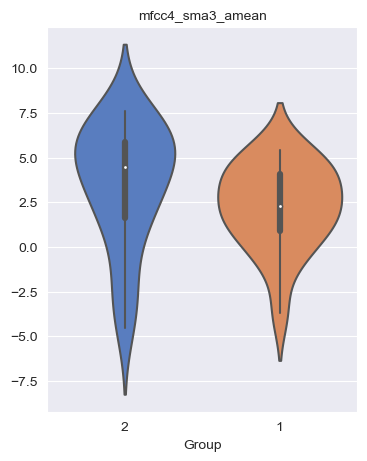

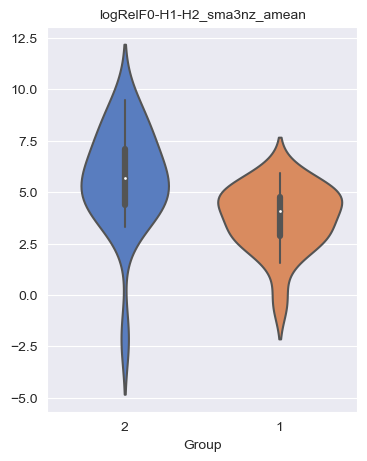

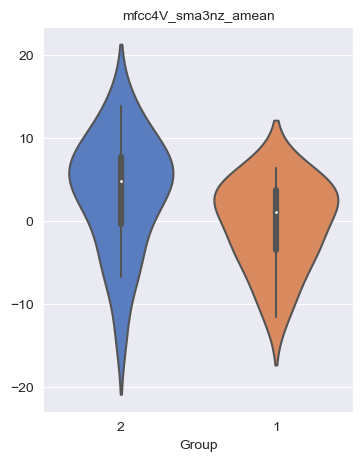

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create violin plots for significant features
sns.set_style("darkgrid")
for feature in significant_features_male_audio:
    plt.figure(figsize=(4, 5))
    sns.violinplot(x='sum', y=feature, data=opensmile_male, inner="box", palette="muted")
    plt.title(feature, fontsize=10)
    plt.xlabel('Group')
    plt.ylabel(None)
    plt.show()

#### Mann-Whitney U test Differences for Female Group

In [34]:
# ISOLATING FEMALE GROUP

opensmile_female = df_all_features[df_all_features['Gender']=='female']

In [35]:
# Print female group sample size

(opensmile_female['sum']).value_counts()

sum
2    21
1    13
Name: count, dtype: int64

In [36]:
np.random.seed(20)
numerical_columns = opensmile_female.select_dtypes(include='number').columns

# Get unique groups in 'Status'
unique_groups = opensmile_female['sum'].unique()

# Store results in a dictionary
mann_whitney_results_female_audio = {}

# Number of bootstrap samples
num_bootstrap_samples = 1000

for column in numerical_columns:
    results = []
    for group1, group2 in itertools.combinations(unique_groups, 2):
        group1_values = opensmile_female[opensmile_female['sum'] == group1][column]
        group2_values = opensmile_female[opensmile_female['sum'] == group2][column]
        
        # Perform Mann-Whitney U test with exact method and calculate p-value
        u_statistic, p_value = stats.mannwhitneyu(group1_values, group2_values, alternative='two-sided', method='exact')
        
        # Perform bootstrapping to estimate more accurate p-value
        u_boot = []
        for _ in range(num_bootstrap_samples):
            combined_values = np.concatenate((group1_values, group2_values))
            np.random.shuffle(combined_values)
            bootstrap_group1 = combined_values[:len(group1_values)]
            bootstrap_group2 = combined_values[len(group1_values):]
            u_statistic_boot, _ = stats.mannwhitneyu(bootstrap_group1, bootstrap_group2, alternative='two-sided', method='exact')
            u_boot.append(u_statistic_boot)
        
        # Calculate bootstrap p-value
        p_value_boot = (np.sum(u_boot >= u_statistic) + 1) / (num_bootstrap_samples + 1)
        
        results.append((group1, group2, u_statistic, p_value, p_value_boot))
    
    mann_whitney_results_female_audio[column] = results

# Print results for each column
for column, results in mann_whitney_results_female_audio.items():
    print(f"\nMann-Whitney U Test results for {column}:\n")
    for result in results:
        group1, group2, u_statistic, p_value, p_value_boot = result
        print(f"Comparison between {group1} and {group2}:")
        print(f"Exact U-statistic = {u_statistic}, Exact p-value = {p_value}")
        print(f"Bootstrap p-value = {p_value_boot}\n")



Mann-Whitney U Test results for F0semitoneFrom27.5Hz_sma3nz_amean:

Comparison between 2 and 1:
Exact U-statistic = 131.0, Exact p-value = 0.8613482546289388
Bootstrap p-value = 0.5494505494505495


Mann-Whitney U Test results for F0semitoneFrom27.5Hz_sma3nz_stddevNorm:

Comparison between 2 and 1:
Exact U-statistic = 127.0, Exact p-value = 0.7531509861767409
Bootstrap p-value = 0.6103896103896104


Mann-Whitney U Test results for F0semitoneFrom27.5Hz_sma3nz_percentile20.0:

Comparison between 2 and 1:
Exact U-statistic = 139.0, Exact p-value = 0.9443092926540008
Bootstrap p-value = 0.4775224775224775


Mann-Whitney U Test results for F0semitoneFrom27.5Hz_sma3nz_percentile50.0:

Comparison between 2 and 1:
Exact U-statistic = 142.0, Exact p-value = 0.8613482546289388
Bootstrap p-value = 0.43356643356643354


Mann-Whitney U Test results for F0semitoneFrom27.5Hz_sma3nz_percentile80.0:

Comparison between 2 and 1:
Exact U-statistic = 131.0, Exact p-value = 0.8613482546289388
Bootstrap p-

In [37]:

# Identify features with p_value_boot < 0.1 and store the corresponding p-values
significant_features_female_audio = []
significant_results_female_audio = []
for column, results in mann_whitney_results_female_audio.items():
    for result in results:
        group1, group2, u_statistic, p_value, p_value_boot = result
        if (p_value_boot < 0.1) & (p_value < 0.1):
            significant_features_female_audio.append(column)
            significant_results_female_audio.append((column, group1, group2, p_value, p_value_boot))
            break


In [38]:
# print Significant features with p_value_boot < 0.1 
for feature, group1, group2, p_value, p_value_boot in significant_results_female_audio:
    print(f"{feature}: Exact p-value: {p_value}, Bootstrap p-value: {p_value_boot}")

F1frequency_sma3nz_amean: Exact p-value: 0.05482717714801388, Bootstrap p-value: 0.03396603396603397
F3frequency_sma3nz_amean: Exact p-value: 0.03858348124540455, Bootstrap p-value: 0.015984015984015984
alphaRatioUV_sma3nz_amean: Exact p-value: 0.04612502270513871, Bootstrap p-value: 0.024975024975024976


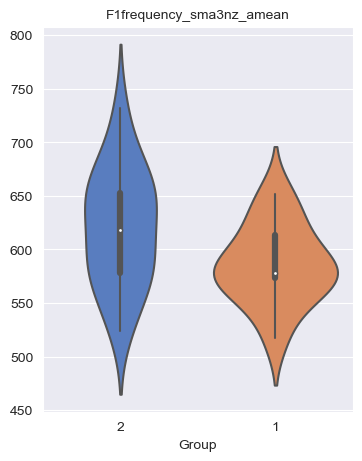

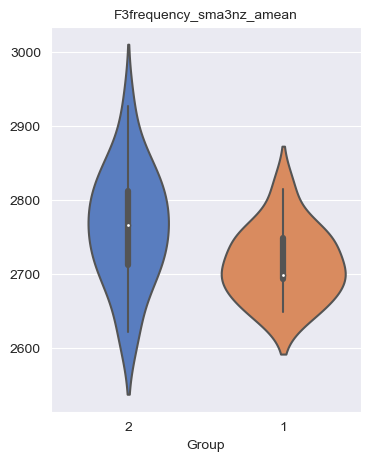

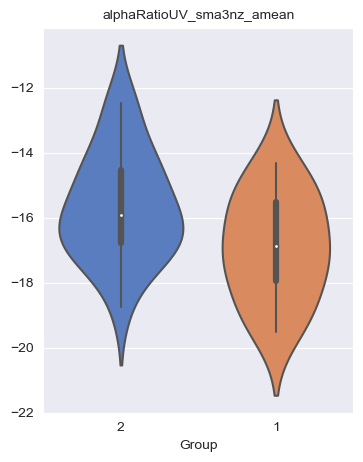

In [39]:
# Generate violin plots for significant features
for feature in significant_features_female_audio:
    plt.figure(figsize=(4, 5))
    sns.violinplot(x='sum', y=feature, data=opensmile_female, inner="box", palette="muted")    
    plt.title(feature, fontsize=10)
    plt.xlabel('Group')
    plt.ylabel(None)
    plt.show()

### Part 2: Visual Features Analysis

In [40]:
# TO EXTRACT VISUAL FILES FROM THE DOWNLOADED FOLDERS

# Changing suffix to match style in filename in archive
file_names = [str(item) + '_P' for item in data_list]

# Folder to save the extracted CSV files
output_folder = os.path.join(local_folder, "extracted_PoseGaze")
os.makedirs(output_folder, exist_ok=True)

# Process each extracted folder
for file_name in file_names:
    extract_path = os.path.join(local_folder, file_name, file_name)
    # Traverse the extracted folder to find the 'features' subfolder
    features_path = os.path.join(extract_path, "features")
    if os.path.exists(features_path):
        # Find CSV files containing "openface"
        for root, dirs, files in os.walk(features_path):
            for file in files:
                if "openface2" in file.lower() and file.endswith(".csv"):
                    csv_path = os.path.join(root, file)
                    destination_path = os.path.join(output_folder, file)
                    
                    # Check if files already exists in the output folder
                    if os.path.exists(destination_path):
                        print(f"Skipping {csv_path}, as it already exists ")
                        continue
                                        
                    # Copy the CSV file to the output folder
                    shutil.copy(csv_path, output_folder)
                    print(f"Copied {csv_path} to {output_folder}")

print("Task completed.")

Skipping C:\Users\Admin\OneDrive - University of Derby\Independent Scholarship one drive\EDAIC Patient files\308_P\308_P\features\308_OpenFace2.1.0_Pose_gaze_AUs.csv, as it already exists 
Skipping C:\Users\Admin\OneDrive - University of Derby\Independent Scholarship one drive\EDAIC Patient files\309_P\309_P\features\309_OpenFace2.1.0_Pose_gaze_AUs.csv, as it already exists 
Skipping C:\Users\Admin\OneDrive - University of Derby\Independent Scholarship one drive\EDAIC Patient files\311_P\311_P\features\311_OpenFace2.1.0_Pose_gaze_AUs.csv, as it already exists 
Skipping C:\Users\Admin\OneDrive - University of Derby\Independent Scholarship one drive\EDAIC Patient files\319_P\319_P\features\319_OpenFace2.1.0_Pose_gaze_AUs.csv, as it already exists 
Skipping C:\Users\Admin\OneDrive - University of Derby\Independent Scholarship one drive\EDAIC Patient files\330_P\330_P\features\330_OpenFace2.1.0_Pose_gaze_AUs.csv, as it already exists 
Skipping C:\Users\Admin\OneDrive - University of Derby\

In [41]:
# Calculate all features with no confidence > 0.85 and success = 1 filtered

# Initialize a list to store the summary data
summary_data = []

# Loop through each file in the folder
for file_name in os.listdir(output_folder):
    if file_name.endswith('.csv'):
        # Read the CSV file
        file_path = os.path.join(output_folder, file_name)
        df = pd.read_csv(file_path)
        
        # Filter rows where 'confidence' > 85 and 'success' = 1
        filtered_df = df[(df['confidence'] > 0.85) & (df['success'] == 1)]
        
        if not filtered_df.empty:
            # Calculate statistical summaries for continuous features
            continuous_features = filtered_df.columns[4:34]
            summary = filtered_df[continuous_features].agg(['mean', 'max', 'min', 'std']).transpose()
            
            # Sum the binary AU features
            binary_features = filtered_df.columns[34:]
            binary_sum = filtered_df[binary_features].sum()
            
            # Combine the summaries into a single row
            summary_row = summary[['mean', 'max', 'min', 'std']].stack().to_frame().T
            summary_row.columns = [f'{col}_{stat}' for col, stat in summary_row.columns]
            
            # Add sums of individual binary features to summary_row
            for col in binary_features:
                summary_row[f'{col}_sum'] = binary_sum[col]
            
            # Use the first three characters of the file name as the index
            summary_row.index = [file_name[:3]]
            
            # Append the summary row to the list
            summary_data.append(summary_row)

# Concatenate all summary rows into a single DataFrame
summary_df2 = pd.concat(summary_data)

# Display the first few rows of the summary DataFrame
summary_df2.head()


pose_Tx_mean  pose_Tx_max  pose_Tx_min  pose_Tx_std  pose_Ty_mean  \
308     11.162285        204.4       -355.0    21.229610     43.139276   
309     74.534662        180.6         15.0    14.225687    -26.437851   
311      1.463605        122.5        -57.8    12.361787     -7.700693   
317     99.277655        211.4         -7.0    14.072722    -99.786987   
319    -30.745335         99.1        -88.6    11.247254     46.709375   

     pose_Ty_max  pose_Ty_min  pose_Ty_std  pose_Tz_mean  pose_Tz_max  ...  \
308        420.1        -29.7    19.302987    712.367886       1949.2  ...   
309        157.1       -107.6    15.965989    586.731077        665.1  ...   
311        163.3        -45.2     9.313592    529.100442        636.6  ...   
317        173.4       -153.4    23.310272    565.085484        708.4  ...   
319        165.3        -11.3    17.289049    389.530607        542.5  ...   

     AU12_c_sum  AU14_c_sum  AU15_c_sum  AU17_c_sum  AU20_c_sum  AU23_c_sum  \
308      1879.0      6486.0      5518.0     12172.0      2823.0      2645.0   
309      5157.0     18672.0      2460.0      6855.0      2077.0     17160.0   
311      1157.0     15752.0      3119.0      5655.0      3682.0     19490.0   
317      5400.0     12008.0      1288.0      7072.0      3394.0      5884.0   
319       203.0     14458.0      7333.0      9559.0      5705.0     11192.0   

     AU25_c_sum  AU26_c_sum  AU28_c_sum  AU45_c_sum  
308      8573.0      6012.0        15.0     12337.0  
309      6538.0      4370.0       999.0      8793.0  
311      8266.0      5455.0       269.0      5903.0  
317     10435.0      8615.0        73.0      8254.0  
319      7805.0      6880.0       835.0      7228.0  

[5 rows x 139 columns]

In [42]:
# Create dummy variable to use as join key

summary_df2['name'] = summary_df2.index

In [43]:
summary_df2['name'] = summary_df2['name'].astype(int)

In [44]:
whole_visual_df = pd.merge(summary_df2, metadata, on='name', how='left')

In [45]:

# Define a function to assign values based on conditions
def assign_status(row):
    if row['PHQ_Binary'] == 1 and row['PCL-C (PTSD)'] == 0:
        return 'Depression'
    elif row['PCL-C (PTSD)'] == 1 and row['PHQ_Binary'] == 0:
        return 'PTSD'
    elif row['PCL-C (PTSD)'] == 1 and row['PHQ_Binary'] == 1:
        return 'Comorbidity'
    else:
        return 'Unknown'  # Handle any other cases here

# Apply the function to create the 'Status' column
whole_visual_df['Status'] = whole_visual_df.apply(assign_status, axis=1)

# Display the updated DataFrame
whole_visual_df.head()

pose_Tx_mean  pose_Tx_max  pose_Tx_min  pose_Tx_std  pose_Ty_mean  \
0     11.162285        204.4       -355.0    21.229610     43.139276   
1     74.534662        180.6         15.0    14.225687    -26.437851   
2      1.463605        122.5        -57.8    12.361787     -7.700693   
3     99.277655        211.4         -7.0    14.072722    -99.786987   
4    -30.745335         99.1        -88.6    11.247254     46.709375   

   pose_Ty_max  pose_Ty_min  pose_Ty_std  pose_Tz_mean  pose_Tz_max  ...  \
0        420.1        -29.7    19.302987    712.367886       1949.2  ...   
1        157.1       -107.6    15.965989    586.731077        665.1  ...   
2        163.3        -45.2     9.313592    529.100442        636.6  ...   
3        173.4       -153.4    23.310272    565.085484        708.4  ...   
4        165.3        -11.3    17.289049    389.530607        542.5  ...   

   name  Participant_ID  AVECParticipant_ID  Gender  PHQ_Binary  PHQ_Score  \
0   308             308        training_006  female           1         22   
1   309             309        training_007    male           1         15   
2   311             311        training_009  female           1         21   
3   317             317      development_04    male           0          8   
4   319             319        training_016    male           1         13   

   PCL-C (PTSD)  PTSD Severity  sum       Status  
0             1             67    2  Comorbidity  
1             1             74    2  Comorbidity  
2             1             70    2  Comorbidity  
3             1             51    1         PTSD  
4             1             53    2  Comorbidity  

[5 rows x 149 columns]

In [46]:
whole_visual_df.shape

(73, 149)

In [47]:
# Exclude non visual columns by converting to string

non_visual_features = [['name', 'Participant_ID', 'PHQ_Binary', 'PHQ_Score', 'PCL-C (PTSD)', 'PTSD Severity', 'sum']]
for col in non_audio_features:
    whole_visual_df[col] = whole_visual_df[col].astype(str)

##### Shapiro Test for Normality Visual Features

In [48]:
import warnings

# to suppress error from the Shapiro-Wilk test for columns with all values = 0
warnings.filterwarnings("ignore", message="Input data for shapiro has range zero")

num_columns_shapiro = whole_visual_df.select_dtypes(include=['number'])

# Initialize counters for normally distributed and non-normally distributed features
normal_count = 0
non_normal_count = 0

# Threshold for significance level
alpha = 0.05

# Perform Shapiro-Wilk test for each numerical column
for col in num_columns_shapiro.columns:
    stat, p = shapiro(num_columns_shapiro[col])
    print(f'{col} - Statistics={stat}, p={p}')
    
    # Check if p-value is greater than alpha (0.05), which indicates normal distribution
    if p > alpha:
        normal_count += 1
    else:
        non_normal_count += 1

# Print the counts
print('--------------------------------------------------------------------------')
print(f'Number of normal features: {normal_count}')
print(f'Number of non-normal features: {non_normal_count}')


pose_Tx_mean - Statistics=0.8920934200286865, p=1.3250579286250286e-05
pose_Tx_max - Statistics=0.36918652057647705, p=4.1191656917273934e-16
pose_Tx_min - Statistics=0.7795494794845581, p=4.233354999882977e-09
pose_Tx_std - Statistics=0.8640657663345337, p=1.2696358453467838e-06
pose_Ty_mean - Statistics=0.9846966862678528, p=0.522318959236145
pose_Ty_max - Statistics=0.593222439289093, p=6.503629557640112e-13
pose_Ty_min - Statistics=0.7471212148666382, p=6.889316894742592e-10
pose_Ty_std - Statistics=0.930162787437439, p=0.0005705905496142805
pose_Tz_mean - Statistics=0.9854206442832947, p=0.5641968846321106
pose_Tz_max - Statistics=0.5559787750244141, p=1.606028271526963e-13
pose_Tz_min - Statistics=0.9699557423591614, p=0.0786038488149643
pose_Tz_std - Statistics=0.8557775020599365, p=6.691980161122046e-07
pose_Rx_mean - Statistics=0.9749789237976074, p=0.1548805683851242
pose_Rx_max - Statistics=0.6934393644332886, p=4.6574986922731654e-11
pose_Rx_min - Statistics=0.9485510587692

#### Mann-Whitney U test for Differences Whole Visual Dataset

In [49]:
import scipy.stats as stats
import itertools

np.random.seed(100)

num_columns = whole_visual_df.select_dtypes(include='number').columns

# Get unique groups in 'Status'
unique_groups = whole_visual_df['sum'].unique()

# Store results in a dictionary
mann_whitney_results_whole_visual = {}

# Number of bootstrap samples
num_bootstrap_samples = 1000

for column in num_columns:
    results = []
    for group1, group2 in itertools.combinations(unique_groups, 2):
        group1_values = whole_visual_df[whole_visual_df['sum'] == group1][column]
        group2_values = whole_visual_df[whole_visual_df['sum'] == group2][column]
        
        # Perform Mann-Whitney U test with exact method and calculate p-value
        u_statistic, p_value = stats.mannwhitneyu(group1_values, group2_values, alternative='two-sided', method='exact')
        
        # Perform bootstrapping to estimate more accurate p-value
        u_boot = []
        for _ in range(num_bootstrap_samples):
            combined_values = np.concatenate((group1_values, group2_values))
            np.random.shuffle(combined_values)
            bootstrap_group1 = combined_values[:len(group1_values)]
            bootstrap_group2 = combined_values[len(group1_values):]
            u_statistic_boot, _ = stats.mannwhitneyu(bootstrap_group1, bootstrap_group2, alternative='two-sided', method='exact')
            u_boot.append(u_statistic_boot)
        
        # Calculate bootstrap p-value
        p_value_boot = (np.sum(u_boot >= u_statistic) + 1) / (num_bootstrap_samples + 1)
        
        results.append((group1, group2, u_statistic, p_value, p_value_boot))
    
    mann_whitney_results_whole_visual[column] = results

# Print results for each column
for column, results in mann_whitney_results_whole_visual.items():
    print(f"\nMann-Whitney U Test results for {column}:\n")
    for result in results:
        group1, group2, u_statistic, p_value, p_value_boot = result
        print(f"Comparison between {group1} and {group2}:")
        print(f"Exact U-statistic = {u_statistic}, Exact p-value = {p_value}")
        print(f"Bootstrap p-value = {p_value_boot}\n")



Mann-Whitney U Test results for pose_Tx_mean:

Comparison between 2 and 1:
Exact U-statistic = 546.0, Exact p-value = 0.24519085855116401
Bootstrap p-value = 0.8791208791208791


Mann-Whitney U Test results for pose_Tx_max:

Comparison between 2 and 1:
Exact U-statistic = 520.5, Exact p-value = 0.14919529749046992
Bootstrap p-value = 0.9410589410589411


Mann-Whitney U Test results for pose_Tx_min:

Comparison between 2 and 1:
Exact U-statistic = 652.5, Exact p-value = 0.9955762620556956
Bootstrap p-value = 0.4905094905094905


Mann-Whitney U Test results for pose_Tx_std:

Comparison between 2 and 1:
Exact U-statistic = 622.0, Exact p-value = 0.7519299086493879
Bootstrap p-value = 0.6383616383616384


Mann-Whitney U Test results for pose_Ty_mean:

Comparison between 2 and 1:
Exact U-statistic = 675.0, Exact p-value = 0.7943835864839844
Bootstrap p-value = 0.4005994005994006


Mann-Whitney U Test results for pose_Ty_max:

Comparison between 2 and 1:
Exact U-statistic = 591.0, Exact p-v

In [50]:

# Identify features with p_value_boot < 0.1 and store the corresponding p-values
significant_features_whole_visual_data = []
significant_results_whole_visual_data = []
for column, results in mann_whitney_results_whole_visual.items():
    for result in results:
        group1, group2, u_statistic, p_value, p_value_boot = result
        if (p_value_boot < 0.1) & (p_value < 0.1):
            significant_features_whole_visual_data.append(column)
            significant_results_whole_visual_data.append((column, group1, group2, p_value, p_value_boot))
            break
# print Significant features with p_value_boot < 0.1 
for feature, group1, group2, p_value, p_value_boot in significant_results_whole_visual_data:
    print(f"{feature}: Exact p-value: {p_value}, Bootstrap p-value: {p_value_boot}")

pose_Rx_max: Exact p-value: 0.04467401856550825, Bootstrap p-value: 0.02197802197802198
AU23_r_max: Exact p-value: 0.05821957656670615, Bootstrap p-value: 0.01998001998001998


In [51]:
male_visual_features = whole_visual_df[whole_visual_df['Gender']=='male']

In [52]:
female_visual_features = whole_visual_df[whole_visual_df['Gender']=='female']

##### Mann-Whitney U test for Differences Male Gender

In [53]:
np.random.seed(123)

num_columns = male_visual_features.select_dtypes(include='number').columns

# Get unique groups in 'Status'
unique_groups = male_visual_features['sum'].unique()

# Store results in a dictionary
mann_whitney_results_male_visual = {}

# Number of bootstrap samples
num_bootstrap_samples = 1000

for column in num_columns:
    results = []
    for group1, group2 in itertools.combinations(unique_groups, 2):
        group1_values = male_visual_features[male_visual_features['sum'] == group1][column]
        group2_values = male_visual_features[male_visual_features['sum'] == group2][column]
        
        # Perform Mann-Whitney U test with exact method and calculate p-value
        u_statistic, p_value = stats.mannwhitneyu(group1_values, group2_values, alternative='two-sided', method='exact')
        
        # Perform bootstrapping to estimate more accurate p-value
        u_boot = []
        for _ in range(num_bootstrap_samples):
            combined_values = np.concatenate((group1_values, group2_values))
            np.random.shuffle(combined_values)
            bootstrap_group1 = combined_values[:len(group1_values)]
            bootstrap_group2 = combined_values[len(group1_values):]
            u_statistic_boot, _ = stats.mannwhitneyu(bootstrap_group1, bootstrap_group2, alternative='two-sided', method='exact')
            u_boot.append(u_statistic_boot)
        
        # Calculate bootstrap p-value
        p_value_boot = (np.sum(u_boot >= u_statistic) + 1) / (num_bootstrap_samples + 1)
        
        results.append((group1, group2, u_statistic, p_value, p_value_boot))
    
    mann_whitney_results_male_visual[column] = results

# Print results for each column
for column, results in mann_whitney_results_male_visual.items():
    print(f"\nMann-Whitney U Test results for {column}:\n")
    for result in results:
        group1, group2, u_statistic, p_value, p_value_boot = result
        print(f"Comparison between {group1} and {group2}:")
        print(f"Exact U-statistic = {u_statistic}, Exact p-value = {p_value}")
        print(f"Bootstrap p-value = {p_value_boot}\n")



Mann-Whitney U Test results for pose_Tx_mean:

Comparison between 2 and 1:
Exact U-statistic = 150.0, Exact p-value = 0.2816013451822882
Bootstrap p-value = 0.8611388611388612


Mann-Whitney U Test results for pose_Tx_max:

Comparison between 2 and 1:
Exact U-statistic = 160.5, Exact p-value = 0.4428597082158247
Bootstrap p-value = 0.8161838161838162


Mann-Whitney U Test results for pose_Tx_min:

Comparison between 2 and 1:
Exact U-statistic = 165.0, Exact p-value = 0.5122444867287217
Bootstrap p-value = 0.7742257742257742


Mann-Whitney U Test results for pose_Tx_std:

Comparison between 2 and 1:
Exact U-statistic = 225.0, Exact p-value = 0.3211265298191275
Bootstrap p-value = 0.17782217782217782


Mann-Whitney U Test results for pose_Ty_mean:

Comparison between 2 and 1:
Exact U-statistic = 243.0, Exact p-value = 0.13290355491937214
Bootstrap p-value = 0.07992007992007992


Mann-Whitney U Test results for pose_Ty_max:

Comparison between 2 and 1:
Exact U-statistic = 193.0, Exact p-

In [54]:

# Identify features with p_value_boot < 0.1 and store the corresponding p-values
significant_features_male_visual = []
significant_results_male_visual = []
for column, results in mann_whitney_results_male_visual.items():
    for result in results:
        group1, group2, u_statistic, p_value, p_value_boot = result
        if (p_value_boot < 0.1) & (p_value < 0.1):
            significant_features_male_visual.append(column)
            significant_results_male_visual.append((column, group1, group2, p_value, p_value_boot))
            break
# print Significant features with p_value_boot < 0.1 
for feature, group1, group2, p_value, p_value_boot in significant_results_male_visual:
    print(f"{feature}: Exact p-value: {p_value}, Bootstrap p-value: {p_value_boot}")

pose_Ty_min: Exact p-value: 0.08842873312828489, Bootstrap p-value: 0.04595404595404595
pose_Rx_max: Exact p-value: 0.0061320635520802, Bootstrap p-value: 0.002997002997002997
AU09_r_std: Exact p-value: 0.07815753979531176, Bootstrap p-value: 0.03796203796203796
AU09_c_sum: Exact p-value: 0.07815753979531176, Bootstrap p-value: 0.030969030969030968


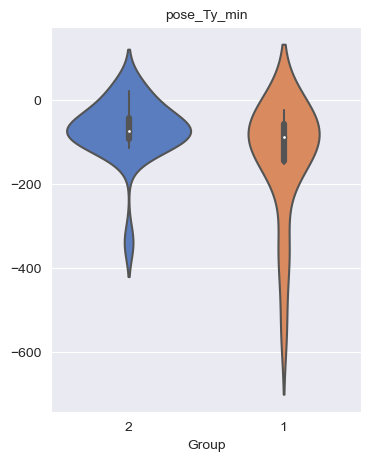

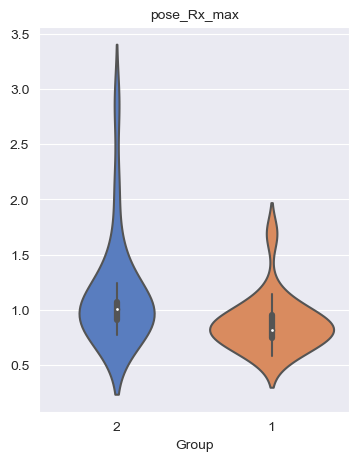

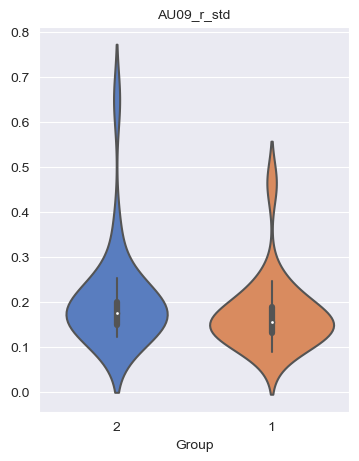

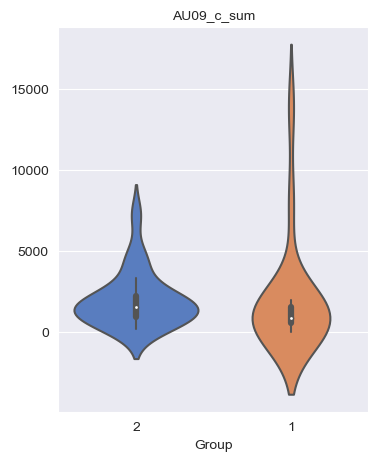

In [55]:
# Generate violin plots for significant features
for feature in significant_features_male_visual:
    plt.figure(figsize=(4, 5))
    sns.violinplot(x='sum', y=feature, data=male_visual_features, inner="box", palette="muted")    
    plt.title(feature, fontsize=10)
    plt.xlabel('Group')
    plt.ylabel(None)
    plt.show()

##### Mann-Whitney U test for Differences Female Gender

In [56]:
import scipy.stats as stats
import numpy as np
import itertools

np.random.seed(213)
num_columns = female_visual_features.select_dtypes(include='number').columns

# Get unique groups in 'Status'
unique_groups = female_visual_features['sum'].unique()

# Store results in a dictionary
mann_whitney_results_female_visual = {}

# Number of bootstrap samples
num_bootstrap_samples = 1000

for column in num_columns:
    results = []
    for group1, group2 in itertools.combinations(unique_groups, 2):
        group1_values = female_visual_features[female_visual_features['sum'] == group1][column]
        group2_values = female_visual_features[female_visual_features['sum'] == group2][column]
        
        # Perform Mann-Whitney U test with exact method and calculate p-value
        u_statistic, p_value = stats.mannwhitneyu(group1_values, group2_values, alternative='two-sided', method='exact')
        
        # Perform bootstrapping to estimate more accurate p-value
        u_boot = []
        for _ in range(num_bootstrap_samples):
            combined_values = np.concatenate((group1_values, group2_values))
            np.random.shuffle(combined_values)
            bootstrap_group1 = combined_values[:len(group1_values)]
            bootstrap_group2 = combined_values[len(group1_values):]
            u_statistic_boot, _ = stats.mannwhitneyu(bootstrap_group1, bootstrap_group2, alternative='two-sided', method='exact')
            u_boot.append(u_statistic_boot)
        
        # Calculate bootstrap p-value
        p_value_boot = (np.sum(u_boot >= u_statistic) + 1) / (num_bootstrap_samples + 1)
        
        results.append((group1, group2, u_statistic, p_value, p_value_boot))
    
    mann_whitney_results_female_visual[column] = results

# Print results for each column
for column, results in mann_whitney_results_female_visual.items():
    print(f"\nMann-Whitney U Test results for {column}:\n")
    for result in results:
        group1, group2, u_statistic, p_value, p_value_boot = result
        print(f"Comparison between {group1} and {group2}:")
        print(f"Exact U-statistic = {u_statistic}, Exact p-value = {p_value}")
        print(f"Bootstrap p-value = {p_value_boot}\n")



Mann-Whitney U Test results for pose_Tx_mean:

Comparison between 2 and 1:
Exact U-statistic = 120.0, Exact p-value = 0.5757104240703522
Bootstrap p-value = 0.7342657342657343


Mann-Whitney U Test results for pose_Tx_max:

Comparison between 2 and 1:
Exact U-statistic = 101.0, Exact p-value = 0.21818114575625763
Bootstrap p-value = 0.8931068931068931


Mann-Whitney U Test results for pose_Tx_min:

Comparison between 2 and 1:
Exact U-statistic = 155.5, Exact p-value = 0.5287790725992877
Bootstrap p-value = 0.27372627372627373


Mann-Whitney U Test results for pose_Tx_std:

Comparison between 2 and 1:
Exact U-statistic = 102.0, Exact p-value = 0.23181598350384924
Bootstrap p-value = 0.8921078921078921


Mann-Whitney U Test results for pose_Ty_mean:

Comparison between 2 and 1:
Exact U-statistic = 87.0, Exact p-value = 0.08245008727307898
Bootstrap p-value = 0.957042957042957


Mann-Whitney U Test results for pose_Ty_max:

Comparison between 2 and 1:
Exact U-statistic = 95.0, Exact p-va

In [57]:

# Identify features with p_value_boot < 0.1 and store the corresponding p-values
significant_features_female_visual = []
significant_results_female_visual = []
for column, results in mann_whitney_results_female_visual.items():
    for result in results:
        group1, group2, u_statistic, p_value, p_value_boot = result
        if (p_value_boot < 0.1) & (p_value < 0.1):
            significant_features_female_visual.append(column)
            significant_results_female_visual.append((column, group1, group2, p_value, p_value_boot))
            break
# print Significant features with p_value_boot < 0.1 
for feature, group1, group2, p_value, p_value_boot in significant_results_female_visual:
    print(f"{feature}: Exact p-value: {p_value}, Bootstrap p-value: {p_value_boot}")

pose_Tz_min: Exact p-value: 0.04612502270513871, Bootstrap p-value: 0.023976023976023976
pose_Rx_min: Exact p-value: 0.050323598335384655, Bootstrap p-value: 0.030969030969030968
gaze_0_y_min: Exact p-value: 0.050323598335384655, Bootstrap p-value: 0.022977022977022976
gaze_1_y_min: Exact p-value: 0.06480941433716468, Bootstrap p-value: 0.03796203796203796
gaze_1_z_min: Exact p-value: 0.08245008727307898, Bootstrap p-value: 0.03396603396603397
gaze_angle_y_min: Exact p-value: 0.03858348124540455, Bootstrap p-value: 0.017982017982017984


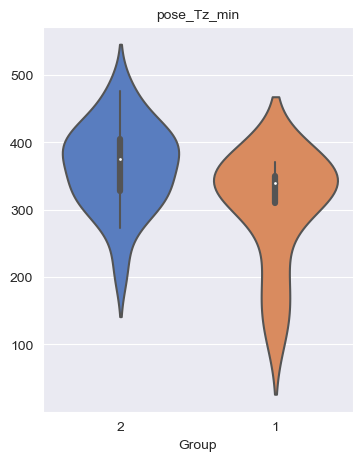

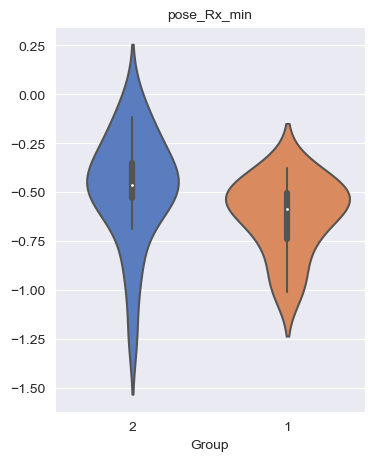

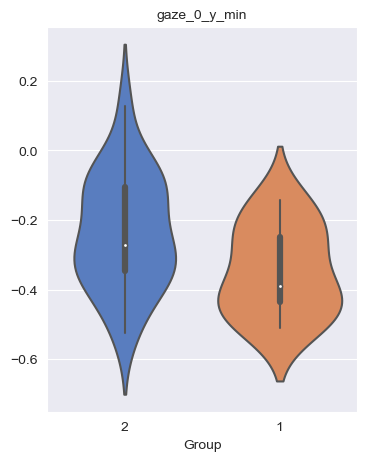

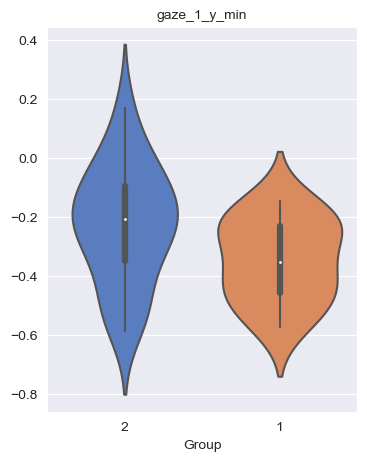

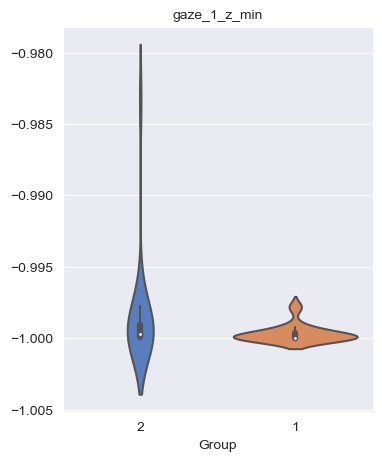

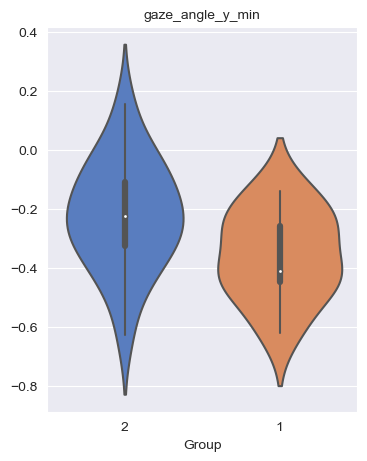

In [58]:
# Generate violin plots for significant features
for feature in significant_features_female_visual:
    plt.figure(figsize=(4, 5))
    sns.violinplot(x='sum', y=feature, data=female_visual_features, inner="box", palette="muted")    
    plt.title(feature, fontsize=10)
    plt.xlabel('Group')
    plt.ylabel(None)
    plt.show()

#### Feature Concatenation 

In [59]:
# Collecting results from the output of Mann U Witney Test for Male
# from audio test
m_audio = [result[0] for result in significant_results_male_audio]

# from visual test part
m_visual = [result[0] for result in significant_results_male_visual]

male_concat1 = opensmile_male[(m_audio + ['Participant_ID'] + ['sum'])]
male_concat2 = male_visual_features[(m_visual + ['Participant_ID'])]


In [60]:
print(m_audio)
print(m_visual)

['mfcc4_sma3_amean', 'logRelF0-H1-H2_sma3nz_amean', 'mfcc4V_sma3nz_amean']
['pose_Ty_min', 'pose_Rx_max', 'AU09_r_std', 'AU09_c_sum']


In [61]:
# Merging both audio and visul features 
male_multimodal_features = pd.merge(male_concat1, male_concat2, on = 'Participant_ID', how = 'left')

In [62]:
male_multimodal_features.set_index('Participant_ID', inplace = True)

In [63]:
(male_multimodal_features['sum']).value_counts()

sum
2    21
1    18
Name: count, dtype: int64

In [64]:
len(male_multimodal_features.columns)

8

In [65]:
male_multimodal_features.head()

mfcc4_sma3_amean  logRelF0-H1-H2_sma3nz_amean  \
Participant_ID                                                  
309                     3.187761                     4.251000   
319                     6.686674                     8.014476   
330                     1.644168                     6.519452   
339                     1.722457                     4.690981   
354                     5.821599                     5.662487   

                mfcc4V_sma3nz_amean sum  pose_Ty_min  pose_Rx_max  AU09_r_std  \
Participant_ID                                                                  
309                      -13.493068   2       -107.6        1.042    0.148644   
319                        7.843000   2        -11.3        0.889    0.222752   
330                       -5.719505   2       -100.4        1.240    0.173064   
339                       -4.770538   1       -122.0        1.017    0.120079   
354                        5.108049   2        -32.4        1.005    0.139845   

                AU09_c_sum  
Participant_ID              
309                  559.0  
319                  918.0  
330                  600.0  
339                  759.0  
354                  224.0

In [66]:
# Collecting results from the output of Mann U Witney Test fro Female
f_audio = [result[0] for result in significant_results_female_audio]
f_visual = [result[0] for result in significant_results_female_visual]

female_concat1 = opensmile_female[(f_audio + ['Participant_ID'] + ['sum'])]
female_concat2 = female_visual_features[(f_visual + ['Participant_ID'])]


In [67]:
print(f_audio)
print(f_visual)

['F1frequency_sma3nz_amean', 'F3frequency_sma3nz_amean', 'alphaRatioUV_sma3nz_amean']
['pose_Tz_min', 'pose_Rx_min', 'gaze_0_y_min', 'gaze_1_y_min', 'gaze_1_z_min', 'gaze_angle_y_min']


In [68]:
female_multimodal_features = pd.merge(female_concat1, female_concat2, on='Participant_ID', how='left')

In [69]:
female_multimodal_features.set_index('Participant_ID', inplace = True)

In [70]:
(female_multimodal_features['sum']).value_counts()

sum
2    21
1    13
Name: count, dtype: int64

In [71]:
female_multimodal_features.head()

F1frequency_sma3nz_amean  F3frequency_sma3nz_amean  \
Participant_ID                                                       
308                           732.524780               2926.483398   
311                           617.802490               2769.656494   
332                           590.551575               2695.544434   
337                           578.282288               2699.989258   
338                           537.279846               2621.220215   

                alphaRatioUV_sma3nz_amean sum  pose_Tz_min  pose_Rx_min  \
Participant_ID                                                            
308                            -17.556789   2        210.1       -0.689   
311                            -16.793686   2        375.6       -0.529   
332                            -15.458315   2        307.6       -0.212   
337                            -12.492595   2        273.3       -0.516   
338                            -14.540317   2        477.2       -0.044   

                gaze_0_y_min  gaze_1_y_min  gaze_1_z_min  gaze_angle_y_min  
Participant_ID                                                              
308                -0.368758     -0.504774     -0.999996            -0.384  
311                -0.385109     -0.485352     -0.999244            -0.460  
332                -0.104736     -0.141534     -0.999812            -0.109  
337                -0.271848     -0.223063     -0.997555            -0.251  
338                 0.128181      0.170791     -0.983341             0.158

In [72]:
len(female_multimodal_features.columns)

10

In [73]:
male_multimodal_features.columns

Index(['mfcc4_sma3_amean', 'logRelF0-H1-H2_sma3nz_amean',
       'mfcc4V_sma3nz_amean', 'sum', 'pose_Ty_min', 'pose_Rx_max',
       'AU09_r_std', 'AU09_c_sum'],
      dtype='object')

In [74]:
female_multimodal_features.columns

Index(['F1frequency_sma3nz_amean', 'F3frequency_sma3nz_amean',
       'alphaRatioUV_sma3nz_amean', 'sum', 'pose_Tz_min', 'pose_Rx_min',
       'gaze_0_y_min', 'gaze_1_y_min', 'gaze_1_z_min', 'gaze_angle_y_min'],
      dtype='object')

### Part 3: Classification Model

In [75]:
male_multimodal_features['sum'] = male_multimodal_features['sum'].astype(float)
female_multimodal_features['sum'] = female_multimodal_features['sum'].astype(float)

In [76]:
female_multimodal_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 308 to 441
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   F1frequency_sma3nz_amean   34 non-null     float32
 1   F3frequency_sma3nz_amean   34 non-null     float32
 2   alphaRatioUV_sma3nz_amean  34 non-null     float32
 3   sum                        34 non-null     float64
 4   pose_Tz_min                34 non-null     float64
 5   pose_Rx_min                34 non-null     float64
 6   gaze_0_y_min               34 non-null     float64
 7   gaze_1_y_min               34 non-null     float64
 8   gaze_1_z_min               34 non-null     float64
 9   gaze_angle_y_min           34 non-null     float64
dtypes: float32(3), float64(7)
memory usage: 2.5+ KB


#### 3A:_ Support Vector Machine | Male Class

In [77]:
!pip install scikit-learn

from sklearn.preprocessing import StandardScaler # for standardizing features

# Import train_test_split for splitting data into training and test sets
# Import GridSearchCV for hyperparameter tuning using cross-validation
from sklearn.model_selection import train_test_split, GridSearchCV

# Import SVC for Support Vector Classification
from sklearn.svm import SVC

# Import metrics for evaluating the performance of the model
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Import matplotlib colors for creating visualizations
import matplotlib.colors as colors


# Load the dataset
X = male_multimodal_features.drop('sum', axis =1)
y = male_multimodal_features['sum']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

# Standardize the features
scaler = StandardScaler()
X_train_male = scaler.fit_transform(X_train)
X_test_male = scaler.transform(X_test)


# Define the parameter grid for each kernel
param_grid = [
    {'kernel': ['rbf'], 'C': [0.5, 1, 10, 100], 'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.001]},
]

param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto'], 'coef0': [0, 1]},
    {'kernel': ['rbf'], 'C': [0.1, 0.5, 1, 10, 100], 'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001]},
    {'kernel': ['sigmoid'], 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'coef0': [0, 1]}
]

# Initialize the SVM classifier
svm_clf = SVC(probability=True)

# Use GridSearchCV to find the best hyperparameters for each kernel
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy', verbose= 0, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_male, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_male)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", test_accuracy)
print("Classification report:\n", classification_report(y_test, y_pred))

# Calculate ROC-AUC
y_proba_SVM_male = best_model.predict_proba(X_test_male)[:, 1]  # Probabilities for the positive class
roc_auc_SVM_male = roc_auc_score(y_test, y_proba_SVM_male)
print("ROC-AUC score: ", roc_auc_SVM_male)


Best parameters found:  {'C': 10, 'kernel': 'linear'}
Best cross-validation score:  0.8300000000000001
Test set accuracy:  0.75
Classification report:
               precision    recall  f1-score   support

         1.0       0.64      1.00      0.78         7
         2.0       1.00      0.56      0.71         9

    accuracy                           0.75        16
   macro avg       0.82      0.78      0.75        16
weighted avg       0.84      0.75      0.74        16

ROC-AUC score:  0.8412698412698413


In [78]:
# Import resample from sklearn.utils for resampling datasets
from sklearn.utils import resample

# for the confusion matrix to evaluate classification performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Building model with best parameters from cross validation
clf_svm = SVC(C = 10, kernel = 'linear', random_state = 50)
clf_svm.fit(X_train_male, y_train)


SVC(C=10, kernel='linear', random_state=50)

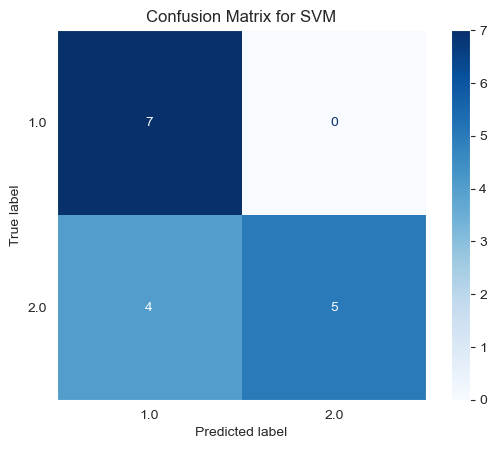

In [79]:
predictions = clf_svm.predict(X_test_male)
cm = confusion_matrix(y_test, predictions, labels=clf_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_svm.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for SVM')
plt.grid(False)
plt.show()

#### 3B: _ Other Classification Models Compare | Male class

Random Forest: Accuracy: 0.6875
 ROC-AUC: 0.8333

Classification report for Random Forest:
               precision    recall  f1-score   support

         1.0       0.60      0.86      0.71         7
         2.0       0.83      0.56      0.67         9

    accuracy                           0.69        16
   macro avg       0.72      0.71      0.69        16
weighted avg       0.73      0.69      0.68        16



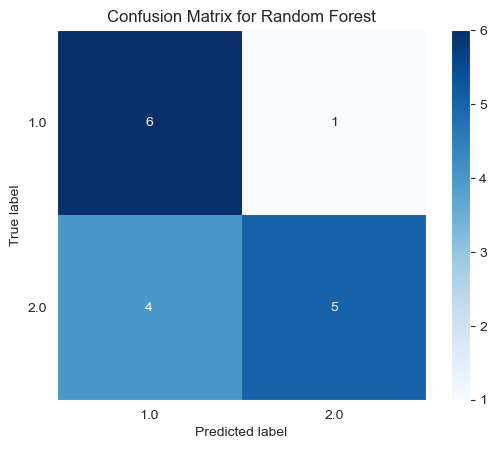

KNN: Accuracy: 0.7500
 ROC-AUC: 0.7460

Classification report for KNN:
               precision    recall  f1-score   support

         1.0       0.71      0.71      0.71         7
         2.0       0.78      0.78      0.78         9

    accuracy                           0.75        16
   macro avg       0.75      0.75      0.75        16
weighted avg       0.75      0.75      0.75        16



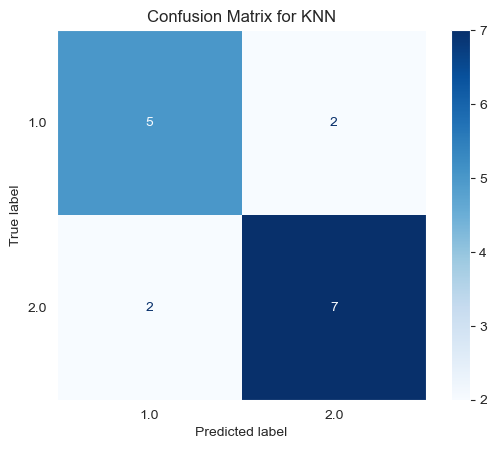

Logistic Regression: Accuracy: 0.7500
 ROC-AUC: 0.7778

Classification report for Logistic Regression:
               precision    recall  f1-score   support

         1.0       0.64      1.00      0.78         7
         2.0       1.00      0.56      0.71         9

    accuracy                           0.75        16
   macro avg       0.82      0.78      0.75        16
weighted avg       0.84      0.75      0.74        16



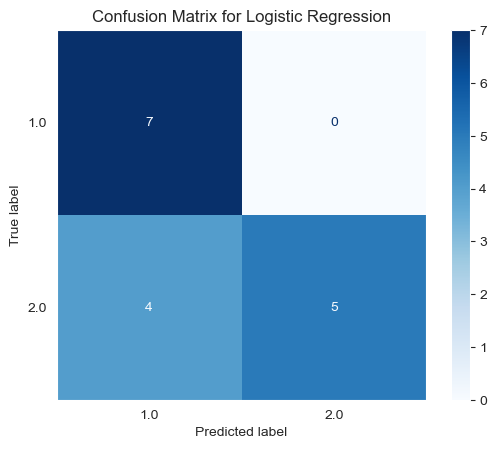

In [80]:
# import other classification algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, classification_report



# Load the dataset
X = male_multimodal_features.drop('sum', axis =1)
y = male_multimodal_features['sum']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifiers
rf_clf = RandomForestClassifier(random_state=50)
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression(random_state=50)

# Dictionary to hold the models
models = {
    'Random Forest': rf_clf,
    'KNN': knn_clf,
    'Logistic Regression': lr_clf
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate probabilities for ROC-AUC score
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:  # KNN and Logistic Regression with no predict_proba attribute
        y_proba = model.decision_function(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Handling binary and multi-class ROC-AUC differently
    if len(y_test.shape) == 1 or y_test.shape[1] == 1:
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    
    # Print the results
    print(f"{model_name}: Accuracy: {accuracy:.4f}\n ROC-AUC: {roc_auc:.4f}\n")

    # Print detailed classification report
    print(f"Classification report for {model_name}:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.grid(False)
    plt.show()

#### 3C: _ Ensemble Voting Classifier | Male

In [81]:
# import Ensemble voting classifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
X = male_multimodal_features.drop('sum', axis =1)
y = male_multimodal_features['sum']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the base models
rf_clf = RandomForestClassifier(random_state=50)
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression(random_state=50)
svc_clf = SVC(probability=True, random_state=50) 

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_clf),
    ('knn', knn_clf),
    ('lr', lr_clf),
    ('svc', svc_clf)
], voting='soft')  

# Train the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test_scaled)

y_proba_voting = voting_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc_voting = roc_auc_score(y_test, y_proba_voting)

print(f"Voting Classifier Accuracy: {accuracy:.4f}\n ROC-AUC: {roc_auc_voting:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Voting Classifier Accuracy: 0.6875
 ROC-AUC: 0.8571

Classification Report:
               precision    recall  f1-score   support

         1.0       0.60      0.86      0.71         7
         2.0       0.83      0.56      0.67         9

    accuracy                           0.69        16
   macro avg       0.72      0.71      0.69        16
weighted avg       0.73      0.69      0.68        16



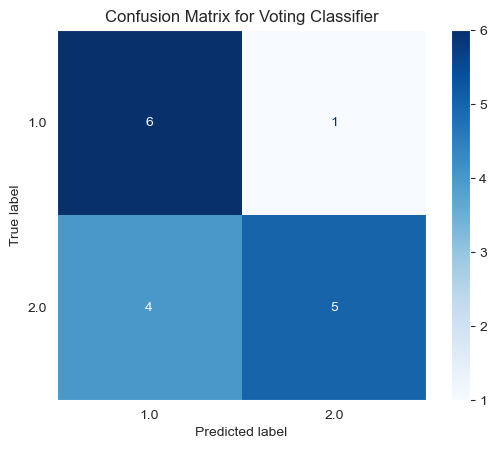

In [82]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=voting_clf.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Voting Classifier')
plt.grid(False)
plt.show()


#### 3D: Male Class Perfromance Metrics Chart

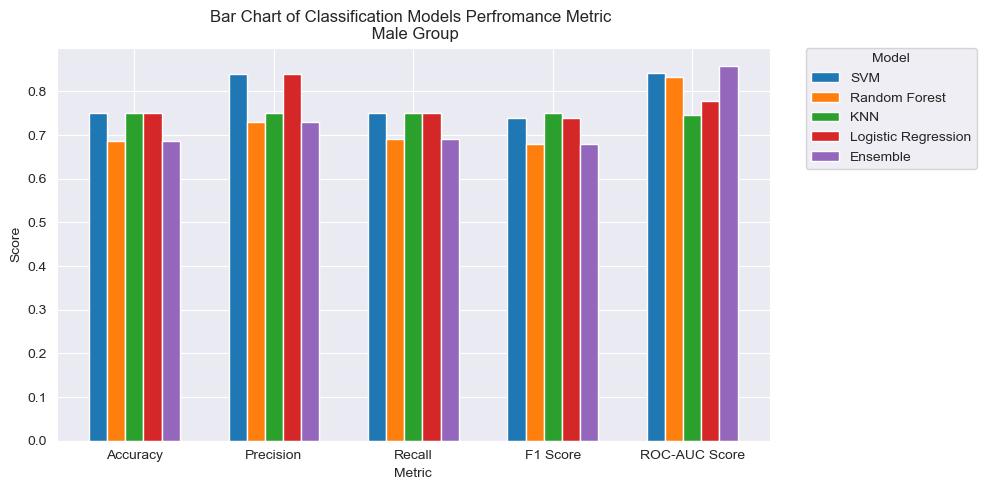

In [83]:

models = ['SVM', 'Random Forest', 'KNN', 'Logistic Regression', 'Ensemble']

# collecting results from models above to create bar chart visualization compare
accuracy = [0.7500, 0.6875, 0.75, 0.75, 0.6875]
precision = [0.84, 0.73, 0.75, 0.84, 0.73]
recall = [0.75, 0.69, 0.75, 0.75, 0.69]
f1_score = [0.74, 0.68, 0.75, 0.74, 0.68]
ROC_AUC_Score = [0.8413, 0.8333, 0.7460, 0.7778, 0.8571]

# Combine all metrics into a single list of lists
metrics = [accuracy, precision, recall, f1_score, ROC_AUC_Score]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC Score']

# Plotting the bar chart
x = np.arange(len(metric_names))  # the label locations
width = 0.13  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
for i, model in enumerate(models):
    ax.bar(x + i * width, [metric[i] for metric in metrics], width, label=model)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Bar Chart of Classification Models Perfromance Metric \n Male Group')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metric_names)
ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.tight_layout()

plt.show()


### 4. Classification Using Principal Component Analysis: Male Group

#### 4A: _ SVM & PCA | Male Class

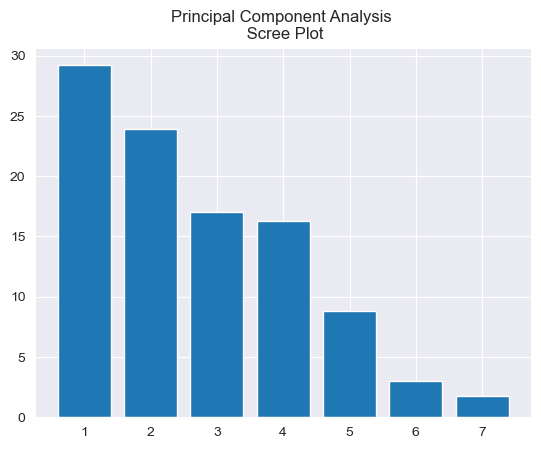

In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X = male_multimodal_features.drop('sum', axis=1)
y = male_multimodal_features['sum']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

# Standardize the features
scaler = StandardScaler()
X_train_scaled_male = scaler.fit_transform(X_train)
X_test_scaled_male = scaler.transform(X_test)

# Perform PCA on the entire dataset
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled_male)
X_test_pca = pca.transform(X_test_scaled_male)
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = [str(x) for x in range (1, len(var)+1)]

plt.bar(x=range(1, len(var)+1), height = var)
plt.title('Principal Component Analysis \n Scree Plot')
plt.show()

In [85]:
# Initialize variables to track the best performance
best_accuracy = 0
best_n_components = 0
best_model = None
best_pca_test_scaled = None  # To store the corresponding test data
best_params = None  # To store the best parameters

# Iterate over different numbers of principal components
for n_components in range(1, X_train_pca.shape[1] + 1):
    # Select the first n_components from the PCA-transformed data
    X_train_male_pca = X_train_pca[:, :n_components]
    X_test_male_pca = X_test_pca[:, :n_components]
    
    # Standardize the PCA-transformed data
    pca_train_scaled = scale(X_train_male_pca)
    pca_test_scaled = scale(X_test_male_pca)

    # SVM Classification model with GridSearchCV
    param_grid = [
        {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
        {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto'], 'coef0': [0, 1]},
        {'kernel': ['rbf'], 'C': [0.1, 0.5, 1, 10, 100], 'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001]},
        {'kernel': ['sigmoid'], 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'coef0': [0, 1]}
    ]
    svm_clf = SVC(probability=True)
    grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
    
    grid_search.fit(pca_train_scaled, y_train)
    
    # Evaluate on the test set
    y_pred = grid_search.best_estimator_.predict(pca_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Track the best performance
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_n_components = n_components
        best_model = grid_search.best_estimator_
        best_pca_test_scaled = pca_test_scaled  # Store the corresponding test data
        best_params = grid_search.best_params_  # Store the best parameters

# Print the results
print(f"Highest accuracy achieved: {best_accuracy} with {best_n_components} principal components")
print(f"Best parameters: {best_params}")

# Additional evaluation of the best model
y_pred_best = best_model.predict(best_pca_test_scaled)
print("Classification report:\n", classification_report(y_test, y_pred_best))

# Calculate ROC-AUC for the best model
y_proba_best = best_model.predict_proba(best_pca_test_scaled)[:, 1]
roc_auc_best = roc_auc_score(y_test, y_proba_best)
print("Best ROC-AUC score: ", roc_auc_best)


Highest accuracy achieved: 0.8125 with 3 principal components
Best parameters: {'C': 100, 'coef0': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Classification report:
               precision    recall  f1-score   support

         1.0       0.83      0.71      0.77         7
         2.0       0.80      0.89      0.84         9

    accuracy                           0.81        16
   macro avg       0.82      0.80      0.81        16
weighted avg       0.81      0.81      0.81        16

Best ROC-AUC score:  0.7619047619047619


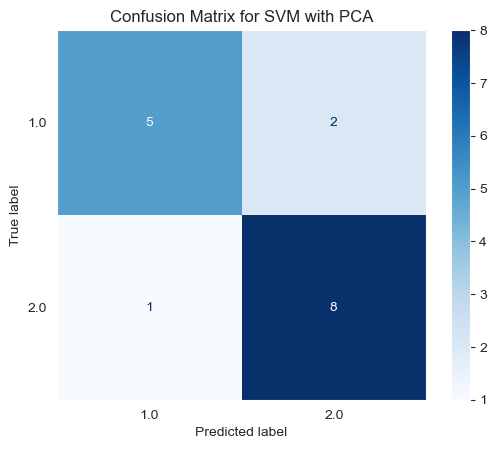

In [86]:
# Confusion matrix from SVM&PCA model

# SVM&PCA Classification model using first three Principal components as found optimal
pca_train_scaled = scale(np.column_stack((X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2])))
pca_test_scaled = scale(np.column_stack((X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2])))

clf_pca = SVC(C = 100, coef0 = 1, degree = 3, gamma = 'scale', kernel = 'poly', random_state = 50)
clf_pca.fit(pca_train_scaled, y_train)
predictedPCA = clf_pca.predict(pca_test_scaled)
cmPCA = confusion_matrix(y_test, predictedPCA, labels=clf_pca.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmPCA, display_labels=clf_pca.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for SVM with PCA')
plt.grid(False)
plt.show()

In [87]:
# Total variance coverved by SVM+PCA model

sum_first_three_pc = np.sum(pca.explained_variance_ratio_[:3])
print("Sum of the eigenvalues of the first three PCs used:", sum_first_three_pc *100)

Sum of the eigenvalues of the first three PCs used: 70.09625835188476


#### 4B: _ Other Classification Models With PCA | Male class

Random Forest: Accuracy: 0.6875
 ROC-AUC: 0.8492

Classification report for Random Forest:
               precision    recall  f1-score   support

         1.0       0.67      0.57      0.62         7
         2.0       0.70      0.78      0.74         9

    accuracy                           0.69        16
   macro avg       0.68      0.67      0.68        16
weighted avg       0.69      0.69      0.68        16



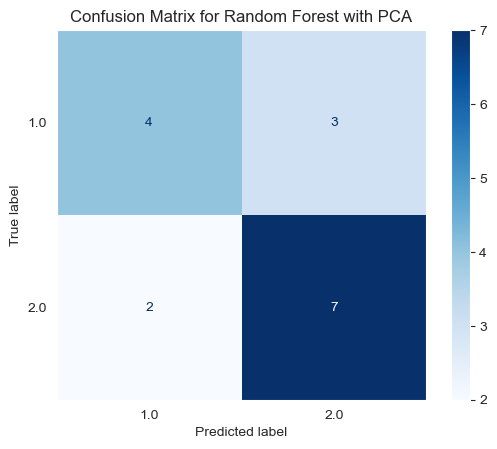

KNN: Accuracy: 0.6875
 ROC-AUC: 0.6984

Classification report for KNN:
               precision    recall  f1-score   support

         1.0       0.62      0.71      0.67         7
         2.0       0.75      0.67      0.71         9

    accuracy                           0.69        16
   macro avg       0.69      0.69      0.69        16
weighted avg       0.70      0.69      0.69        16



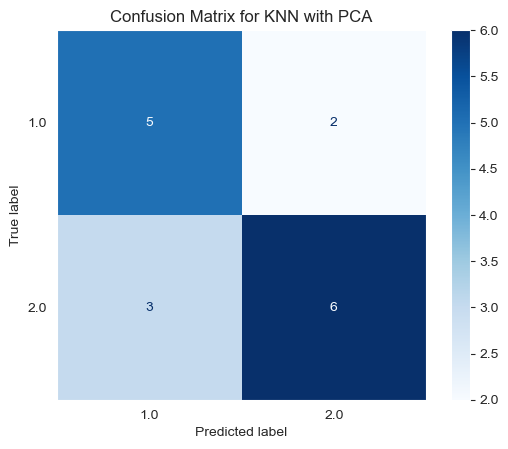

Logistic Regression: Accuracy: 0.6875
 ROC-AUC: 0.7937

Classification report for Logistic Regression:
               precision    recall  f1-score   support

         1.0       0.62      0.71      0.67         7
         2.0       0.75      0.67      0.71         9

    accuracy                           0.69        16
   macro avg       0.69      0.69      0.69        16
weighted avg       0.70      0.69      0.69        16



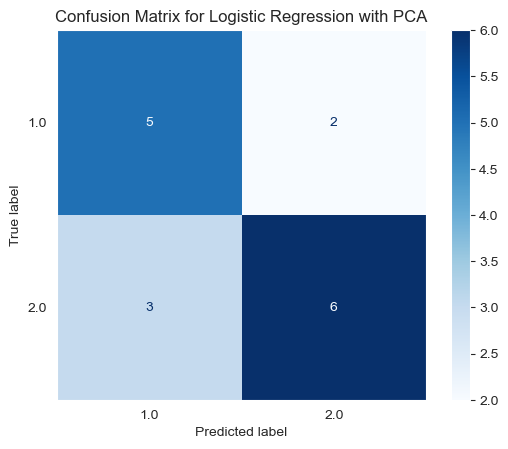

In [88]:

# Initialize the classifiers
rf_clf = RandomForestClassifier(random_state=50)
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression(random_state=50)

# Dictionary to hold the models
models = {
    'Random Forest': rf_clf,
    'KNN': knn_clf,
    'Logistic Regression': lr_clf
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(pca_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(pca_test_scaled)
    
    # Calculate probabilities for ROC-AUC score
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(pca_test_scaled)[:, 1]
    else:  # KNN and Logistic Regression with no predict_proba attribute
        y_proba = model.decision_function(pca_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
   
    
    # Handling binary and multi-class ROC-AUC differently
    if len(y_test.shape) == 1 or y_test.shape[1] == 1:
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    
    # Print the results
    print(f"{model_name}: Accuracy: {accuracy:.4f}\n ROC-AUC: {roc_auc:.4f}\n")

    # Print detailed classification report
    print(f"Classification report for {model_name}:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name} with PCA')
    plt.grid(False)
    plt.show()

#### _4C: Ensemble Voting with PCA Male Class

In [89]:

# Initialize the base models
rf_clf = RandomForestClassifier(random_state=50)
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression(random_state=50)
svc_clf = SVC(probability=True, random_state=50) 

# Create the Voting Classifier
voting_clf_pca = VotingClassifier(estimators=[
    ('rf', rf_clf),
    ('knn', knn_clf),
    ('lr', lr_clf),
    ('svc', svc_clf)
], voting='soft')  

# Train the Voting Classifier
voting_clf_pca.fit(pca_train_scaled, y_train)

# Make predictions
y_pred = voting_clf_pca.predict(pca_test_scaled)

y_proba_voting = voting_clf_pca.predict_proba(pca_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc_voting = roc_auc_score(y_test, y_proba_voting)

print(f"Voting Classifier Accuracy: {accuracy:.4f}\n ROC-AUC: {roc_auc_voting:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Voting Classifier Accuracy: 0.8125
 ROC-AUC: 0.7937

Classification Report:
               precision    recall  f1-score   support

         1.0       0.83      0.71      0.77         7
         2.0       0.80      0.89      0.84         9

    accuracy                           0.81        16
   macro avg       0.82      0.80      0.81        16
weighted avg       0.81      0.81      0.81        16



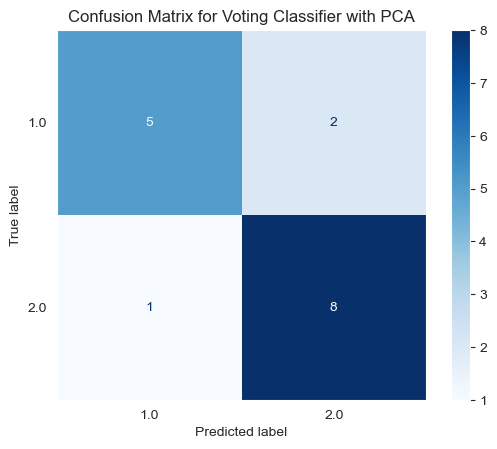

In [90]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=voting_clf_pca.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf_pca.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Voting Classifier with PCA')
plt.grid(False)
plt.show()


#### 4D: Male Class Perfromance Metrics Chart After PCA

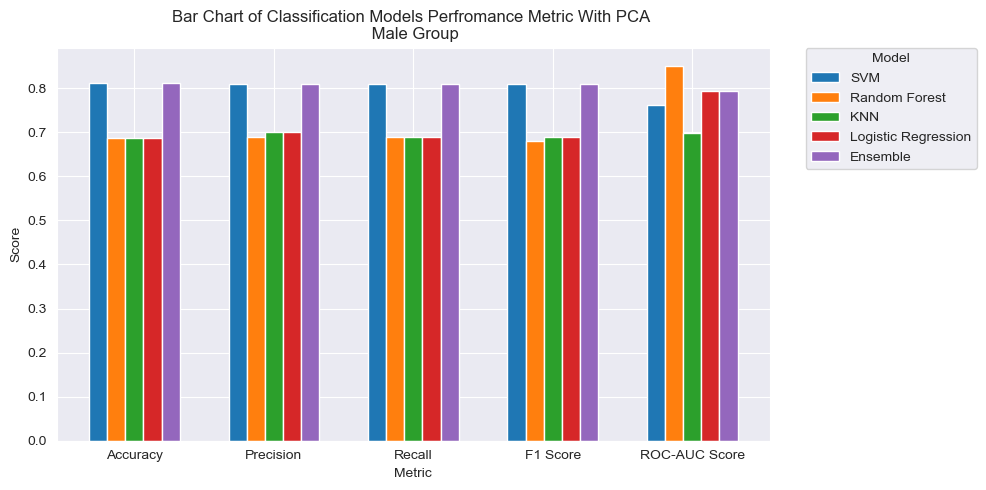

In [91]:

models = ['SVM', 'Random Forest', 'KNN', 'Logistic Regression', 'Ensemble']

accuracy = [0.8125, 0.6875, 0.6875, 0.6875, 0.8125]
precision = [0.81, 0.69, 0.70, 0.70, 0.81]
recall = [0.81, 0.69, 0.69, 0.69, 0.81]
f1_score = [0.81, 0.68, 0.69, 0.69, 0.81]
ROC_AUC_Score = [0.7619, 0.8492, 0.6984, 0.7937, 0.7937]

# Combine all metrics into a single list of lists
metrics = [accuracy, precision, recall, f1_score, ROC_AUC_Score]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC Score']

# Plotting the bar chart
x = np.arange(len(metric_names))  # the label locations
width = 0.13  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
for i, model in enumerate(models):
    ax.bar(x + i * width, [metric[i] for metric in metrics], width, label=model)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Bar Chart of Classification Models Perfromance Metric With PCA \n Male Group')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metric_names)
ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.tight_layout()

plt.show()


#### 5A:_ Support Vector Machine | Female Class

In [92]:
# Load the dataset
X = female_multimodal_features.drop('sum', axis =1)
y = female_multimodal_features['sum']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=112)

# Standardize the features
scaler = StandardScaler()
X_train_female = scaler.fit_transform(X_train)
X_test_female = scaler.transform(X_test)


# Define the parameter grid for each kernel
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto'], 'coef0': [0, 1]},
    {'kernel': ['rbf'], 'C': [0.1, 0.5, 1, 10, 100], 'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001]},
    {'kernel': ['sigmoid'], 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'coef0': [0, 1]}
]
# Initialize the SVM classifier
svm_clf = SVC(probability = True)

# Use GridSearchCV to find the best hyperparameters for each kernel
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy', verbose= 0, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_female, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_female)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", test_accuracy)
print("Classification report:\n", classification_report(y_test, y_pred))

# Calculate ROC-AUC
y_proba_svmF = best_model.predict_proba(X_test_female)[:, 1]  # Probabilities for the positive class
roc_auc_svmF = roc_auc_score(y_test, y_proba_svmF)
print("ROC-AUC score: ", roc_auc_svmF)

Best parameters found:  {'C': 0.1, 'kernel': 'linear'}
Best cross-validation score:  0.85
Test set accuracy:  0.7857142857142857
Classification report:
               precision    recall  f1-score   support

         1.0       0.71      0.83      0.77         6
         2.0       0.86      0.75      0.80         8

    accuracy                           0.79        14
   macro avg       0.79      0.79      0.78        14
weighted avg       0.80      0.79      0.79        14

ROC-AUC score:  0.9166666666666667


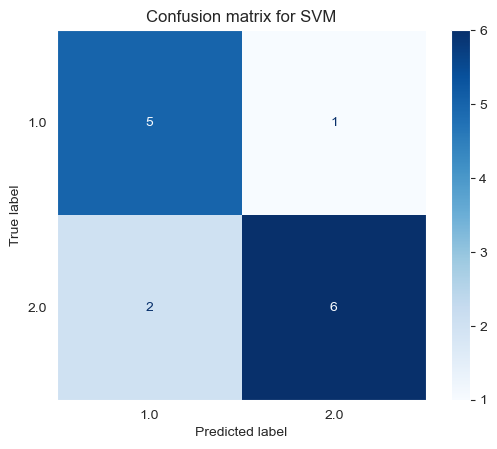

In [93]:
# Building model with best parameters from cross validation

predictions = best_model.predict(X_test_female)
cm = confusion_matrix(y_test, predictions, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.title('Confusion matrix for SVM')
plt.show()

#### 5B: _ Other Classification Models Compare | Female class

Random Forest: Accuracy: 0.8571
 ROC-AUC: 0.8438

Classification report for Random Forest:
               precision    recall  f1-score   support

         1.0       0.83      0.83      0.83         6
         2.0       0.88      0.88      0.88         8

    accuracy                           0.86        14
   macro avg       0.85      0.85      0.85        14
weighted avg       0.86      0.86      0.86        14



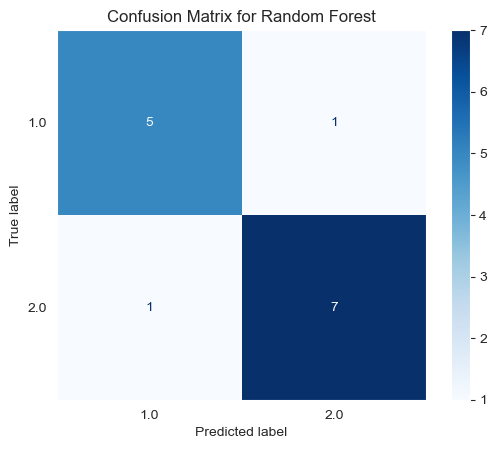

KNN: Accuracy: 0.7143
 ROC-AUC: 0.7708

Classification report for KNN:
               precision    recall  f1-score   support

         1.0       0.62      0.83      0.71         6
         2.0       0.83      0.62      0.71         8

    accuracy                           0.71        14
   macro avg       0.73      0.73      0.71        14
weighted avg       0.74      0.71      0.71        14



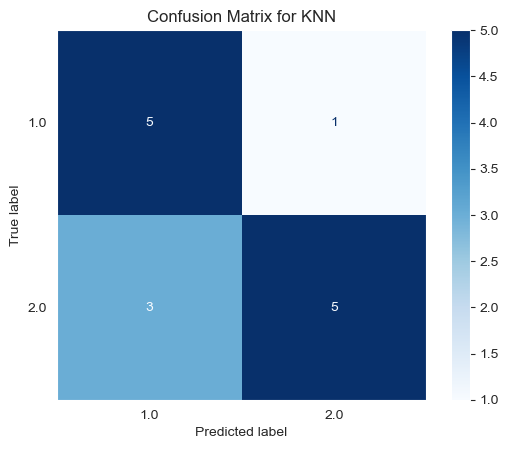

Logistic Regression: Accuracy: 0.6429
 ROC-AUC: 0.8958

Classification report for Logistic Regression:
               precision    recall  f1-score   support

         1.0       0.56      0.83      0.67         6
         2.0       0.80      0.50      0.62         8

    accuracy                           0.64        14
   macro avg       0.68      0.67      0.64        14
weighted avg       0.70      0.64      0.64        14



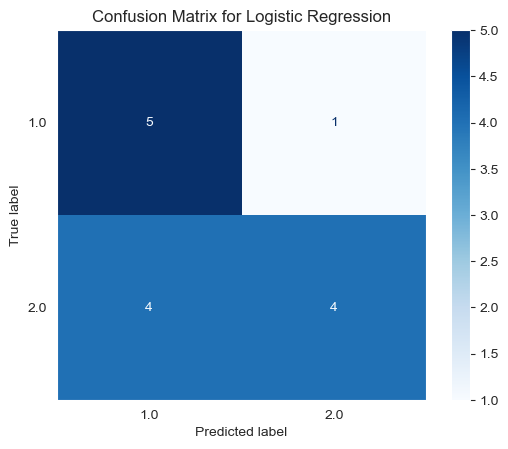

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, classification_report


X = female_multimodal_features.drop('sum', axis =1)
y = female_multimodal_features['sum']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=112)

scaler = StandardScaler()
X_train_scF = scaler.fit_transform(X_train)
X_test_scF = scaler.transform(X_test)
# Initialize the classifiers
rf_clf = RandomForestClassifier(random_state=50)
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression(random_state=50)

# Dictionary to hold the models
models = {
    'Random Forest': rf_clf,
    'KNN': knn_clf,
    'Logistic Regression': lr_clf
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scF, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scF)
    
    # Calculate probabilities for ROC-AUC score
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scF)[:, 1]
    else:  # KNN and Logistic Regression with no predict_proba attribute
        y_proba = model.decision_function(X_test_scF)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    
    # Handling binary and multi-class ROC-AUC differently
    if len(y_test.shape) == 1 or y_test.shape[1] == 1:
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    
    # Print the results
    print(f"{model_name}: Accuracy: {accuracy:.4f}\n ROC-AUC: {roc_auc:.4f}\n")

    # Print detailed classification report
    print(f"Classification report for {model_name}:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.grid(False)
    plt.show()

#### 5C: _ Ensemble Voting Classifier | Female

In [95]:
# Load the dataset
X = female_multimodal_features.drop('sum', axis =1)
y = female_multimodal_features['sum']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=112)

# Standardize the features
scaler = StandardScaler()
X_train_female = scaler.fit_transform(X_train)
X_test_female = scaler.transform(X_test)


# Initialize the base models
rf_clf = RandomForestClassifier(random_state=111)
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression(random_state=111)
svc_clf = SVC(probability=True, random_state=111)

# Create the Voting Classifier
voting_clf_female = VotingClassifier(estimators=[
    ('rf', rf_clf),
    ('knn', knn_clf),
    ('lr', lr_clf),
    ('svc', svc_clf)
], voting='soft')

# Train the Voting Classifier
voting_clf_female.fit(X_train_female, y_train)

# Make predictions
y_pred = voting_clf_female.predict(X_test_female)
y_proba_votingF = voting_clf_female.predict_proba(X_test_female)[:, 1]

# Evaluate the model
accuracy_votingF = accuracy_score(y_test, y_pred)
roc_auc_votingF = roc_auc_score(y_test, y_proba_votingF)

print(f"Voting Classifier Accuracy: {accuracy_votingF:.4f}\n ROC-AUC: {roc_auc_votingF:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Voting Classifier Accuracy: 0.7857
 ROC-AUC: 0.8750

Classification Report:
               precision    recall  f1-score   support

         1.0       0.71      0.83      0.77         6
         2.0       0.86      0.75      0.80         8

    accuracy                           0.79        14
   macro avg       0.79      0.79      0.78        14
weighted avg       0.80      0.79      0.79        14



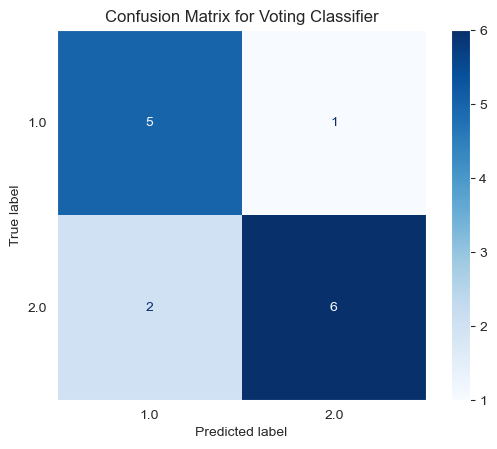

In [96]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=voting_clf_female.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf_female.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Voting Classifier')
plt.grid(False)
plt.show()


#### 5D: Female Class Perfromance Metrics Chart

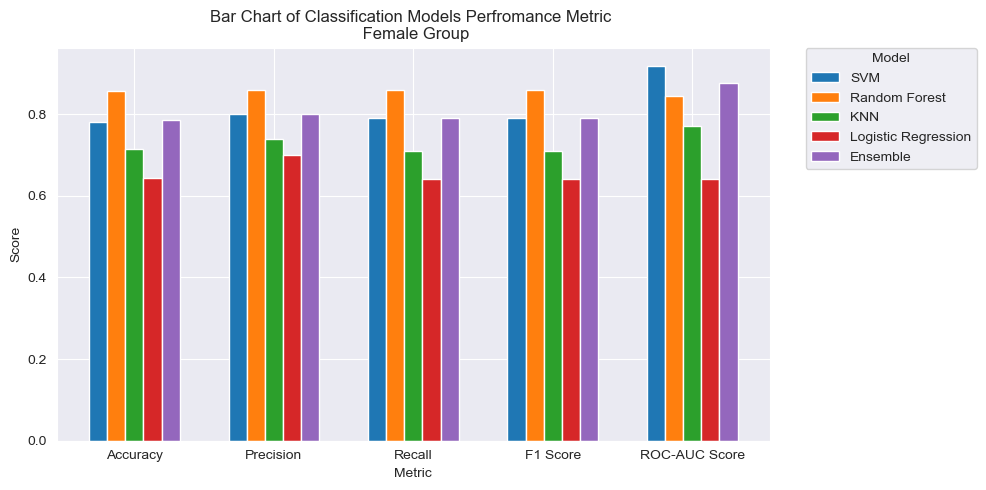

In [97]:

models = ['SVM', 'Random Forest', 'KNN', 'Logistic Regression', 'Ensemble']

accuracy = [0.78, 0.8571, 0.7143, 0.6429, 0.7857]
precision = [0.80, 0.86, 0.74, 0.70, 0.8]
recall = [0.79, 0.86, 0.71, 0.64, 0.79]
f1_score = [0.79, 0.86, 0.71, 0.64, 0.79]
ROC_AUC_Score = [0.9167, 0.8438, 0.7708, 0.64, 0.8750]

# Combine all metrics into a single list of lists
metrics = [accuracy, precision, recall, f1_score, ROC_AUC_Score]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC Score']

# Plotting the bar chart
x = np.arange(len(metric_names))  # the label locations
width = 0.13  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
for i, model in enumerate(models):
    ax.bar(x + i * width, [metric[i] for metric in metrics], width, label=model)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Bar Chart of Classification Models Perfromance Metric \n Female Group')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metric_names)
ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.tight_layout()

plt.show()


### 6. Classification Using Principal Component Analysis: Female Group

#### 6A: _ SVM & PCA | Female Class

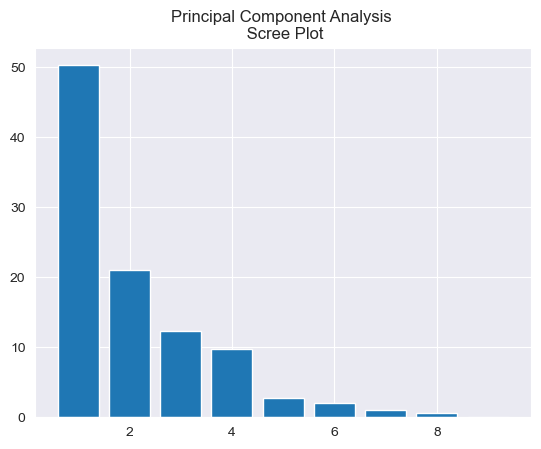

In [98]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X = female_multimodal_features.drop('sum', axis=1)
y = female_multimodal_features['sum']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=112)

# Standardize the features
scaler = StandardScaler()
X_train_scaled_female = scaler.fit_transform(X_train)
X_test_scaled_female = scaler.transform(X_test)

# Perform PCA on the entire dataset
pca = PCA()
X_train_pcaF = pca.fit_transform(X_train_scaled_female)
X_test_pcaF = pca.transform(X_test_scaled_female)
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = [str(x) for x in range (1, len(var)+1)]

plt.bar(x=range(1, len(var)+1), height = var)
plt.title('Principal Component Analysis \n Scree Plot')
plt.show()

In [99]:

# Initialize variables to track the best performance
best_accuracy = 0
best_n_components = 0
best_model = None
best_pca_test_scaled = None  # To store the corresponding test data
best_params = None  # To store the best parameters

# Iterate over different numbers of principal components
for n_components in range(1, X_train_pcaF.shape[1] + 1):
    # Select the first n_components from the PCA-transformed data
    X_train_female_pca = X_train_pcaF[:, :n_components]
    X_test_female_pca = X_test_pcaF[:, :n_components]
    
    # Standardize the PCA-transformed data
    pca_train_scaled = scale(X_train_female_pca)
    pca_test_scaled = scale(X_test_female_pca)

    # SVM Classification model with GridSearchCV
    param_grid = [
        {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
        {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto'], 'coef0': [0, 1]},
        {'kernel': ['rbf'], 'C': [0.1, 0.5, 1, 10, 100], 'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001]},
        {'kernel': ['sigmoid'], 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'coef0': [0, 1]}
    ]
    svm_clf = SVC(probability=True)
    grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
    
    grid_search.fit(pca_train_scaled, y_train)
    
    # Evaluate on the test set
    y_pred = grid_search.best_estimator_.predict(pca_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Track the best performance
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_n_components = n_components
        best_model = grid_search.best_estimator_
        best_pca_test_scaled = pca_test_scaled  # Store the corresponding test data
        best_params = grid_search.best_params_  # Store the best parameters

# Print the results
print(f"Highest accuracy achieved: {best_accuracy} with {best_n_components} principal components")
print(f"Best parameters: {best_params}")

# Additional evaluation of the best model
y_pred_best = best_model.predict(best_pca_test_scaled)
print("Classification report:\n", classification_report(y_test, y_pred_best))

# Calculate ROC-AUC for the best model
y_proba_best = best_model.predict_proba(best_pca_test_scaled)[:, 1]
roc_auc_best = roc_auc_score(y_test, y_proba_best)
print("Best ROC-AUC score: ", roc_auc_best)

Highest accuracy achieved: 0.7142857142857143 with 2 principal components
Best parameters: {'C': 10, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Classification report:
               precision    recall  f1-score   support

         1.0       0.75      0.50      0.60         6
         2.0       0.70      0.88      0.78         8

    accuracy                           0.71        14
   macro avg       0.72      0.69      0.69        14
weighted avg       0.72      0.71      0.70        14

Best ROC-AUC score:  0.8958333333333334


In [100]:
# Total variance coverved by SVM+PCA model female

sum_first_four_pc = np.sum(pca.explained_variance_ratio_[:2])
print("Sum of the eigenvalues of the first two PCs used:", sum_first_four_pc *100)

Sum of the eigenvalues of the first two PCs used: 71.29847253276623


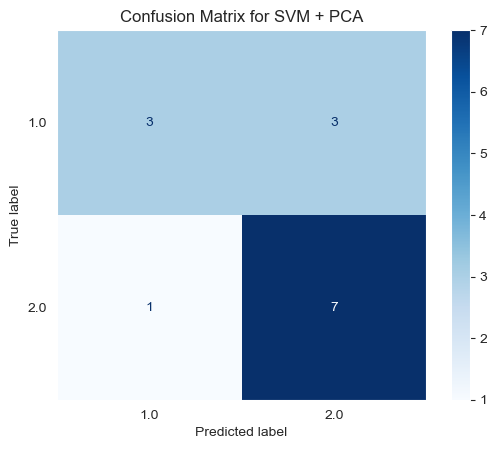

In [101]:
# Confusion matrix from SVM&PCA model using first two Principal Components
pca_train_scaledF = scale(np.column_stack((X_train_pcaF[:, 0], X_train_pcaF[:, 1])))
pca_test_scaledF = scale(np.column_stack((X_test_pcaF[:, 0], X_test_pcaF[:, 1])))

predictedPCA = best_model.predict(pca_test_scaledF)
cmPCA = confusion_matrix(y_test, predictedPCA, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmPCA, display_labels=clf_pca.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for SVM + PCA')
plt.grid(False)
plt.show()

#### 6B: _ Other Classification Models With PCA | Female class

Random Forest: Accuracy: 0.7143
 ROC-AUC: 0.7917

Classification report for Random Forest:
               precision    recall  f1-score   support

         1.0       0.75      0.50      0.60         6
         2.0       0.70      0.88      0.78         8

    accuracy                           0.71        14
   macro avg       0.72      0.69      0.69        14
weighted avg       0.72      0.71      0.70        14



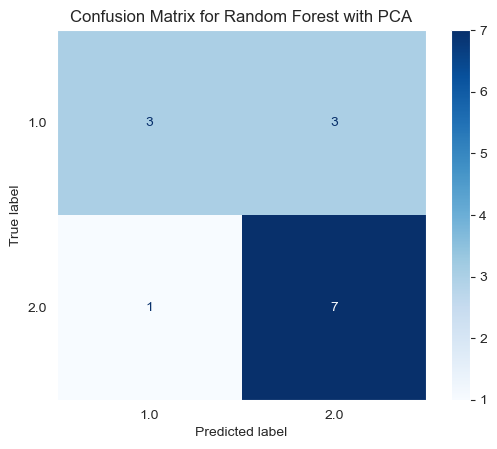

KNN: Accuracy: 0.7857
 ROC-AUC: 0.9167

Classification report for KNN:
               precision    recall  f1-score   support

         1.0       0.80      0.67      0.73         6
         2.0       0.78      0.88      0.82         8

    accuracy                           0.79        14
   macro avg       0.79      0.77      0.78        14
weighted avg       0.79      0.79      0.78        14



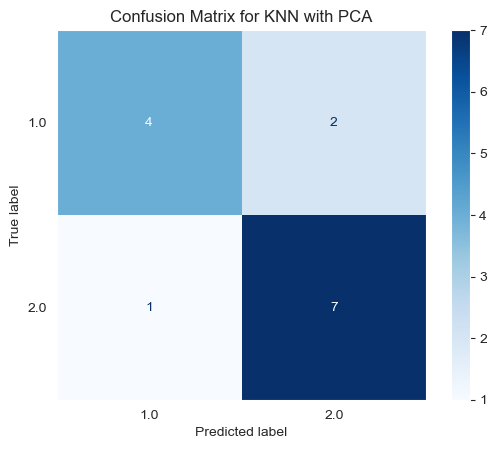

Logistic Regression: Accuracy: 0.7857
 ROC-AUC: 0.9167

Classification report for Logistic Regression:
               precision    recall  f1-score   support

         1.0       0.80      0.67      0.73         6
         2.0       0.78      0.88      0.82         8

    accuracy                           0.79        14
   macro avg       0.79      0.77      0.78        14
weighted avg       0.79      0.79      0.78        14



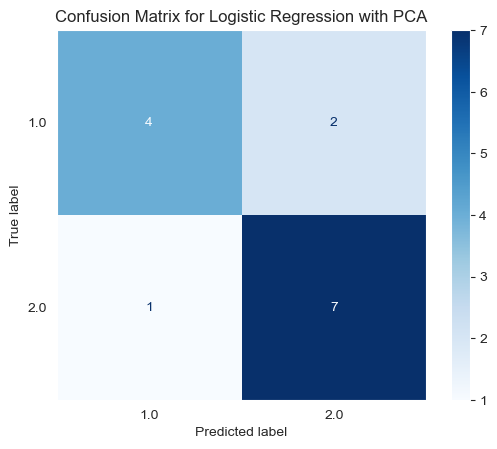

In [102]:
# SVM&PCA Classification model using first two Principal Components
pca_train_scaledF = scale(np.column_stack((X_train_pcaF[:, 0], X_train_pcaF[:, 1])))
pca_test_scaledF = scale(np.column_stack((X_test_pcaF[:, 0], X_test_pcaF[:, 1])))


# Initialize the classifiers
rf_clf = RandomForestClassifier(random_state=50)
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression(random_state=50)

# Dictionary to hold the models
models = {
    'Random Forest': rf_clf,
    'KNN': knn_clf,
    'Logistic Regression': lr_clf
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(pca_train_scaledF, y_train)
    
    # Predict on the first three PCs as test set
    y_pred = model.predict(pca_test_scaledF)
    
    # Calculate probabilities for ROC-AUC score
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(pca_test_scaledF)[:, 1]
    else:  # KNN and Logistic Regression with no predict_proba attribute
        y_proba = model.decision_function(pca_test_scaledF)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    
    # Handling binary and multi-class ROC-AUC differently
    if len(y_test.shape) == 1 or y_test.shape[1] == 1:
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    
    # Print the results
    print(f"{model_name}: Accuracy: {accuracy:.4f}\n ROC-AUC: {roc_auc:.4f}\n")

    # Print the classification report
    print(f"Classification report for {model_name}:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name} with PCA')
    plt.grid(False)
    plt.show()

#### _5C: Ensemble Voting with PCA

In [103]:

# Initializing the base models
rf_clf = RandomForestClassifier(random_state=111)
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression(random_state=111)
svc_clf = SVC(probability=True, random_state=111)

# to create the Voting Classifier
voting_clf_pcaF = VotingClassifier(estimators=[
    ('rf', rf_clf),
    ('knn', knn_clf),
    ('lr', lr_clf),
    ('svc', svc_clf)
], voting='soft')

# Train the Voting Classifier
voting_clf_pcaF.fit(pca_train_scaledF, y_train)

# Make predictions
y_pred = voting_clf_pcaF.predict(pca_test_scaledF)
y_proba_votingF = voting_clf_pcaF.predict_proba(pca_test_scaledF)[:, 1]

# Evaluate the model
accuracy_votingF = accuracy_score(y_test, y_pred)
roc_auc_votingF = roc_auc_score(y_test, y_proba_votingF)

print(f"Voting Classifier Accuracy: {accuracy_votingF:.4f}\n ROC-AUC: {roc_auc_votingF:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Voting Classifier Accuracy: 0.7857
 ROC-AUC: 0.8958

Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      0.50      0.67         6
         2.0       0.73      1.00      0.84         8

    accuracy                           0.79        14
   macro avg       0.86      0.75      0.75        14
weighted avg       0.84      0.79      0.77        14



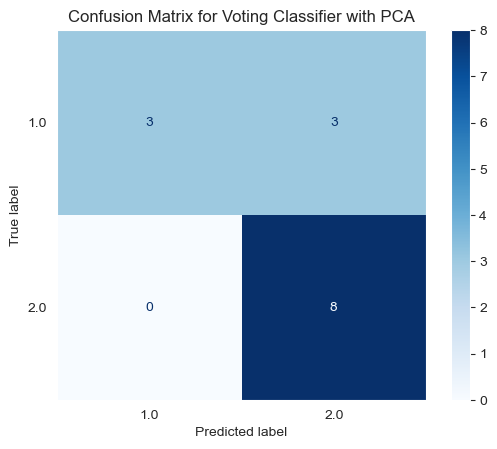

In [104]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=voting_clf_pcaF.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf_pcaF.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Voting Classifier with PCA')
plt.grid(False)
plt.show()


#### 6C: Female Class Perfromance Metrics Chart Using PCA

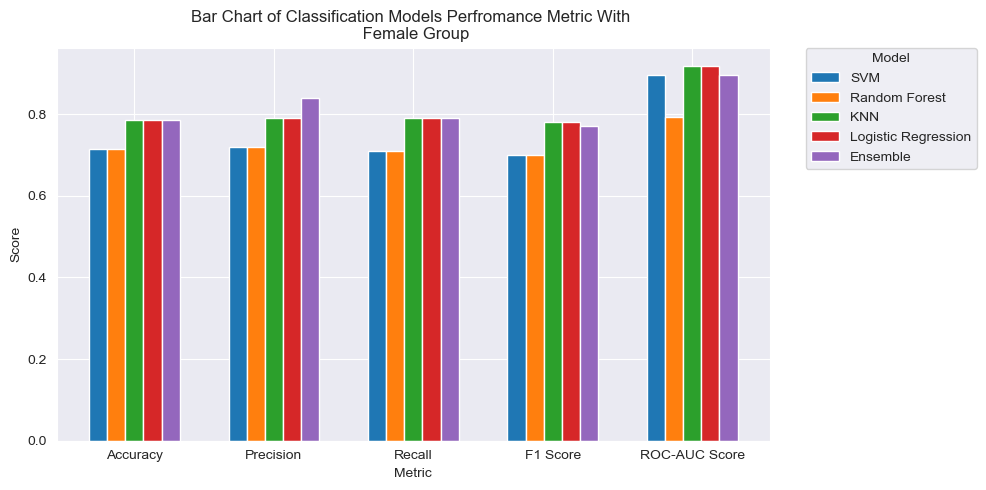

In [105]:

models = ['SVM', 'Random Forest', 'KNN', 'Logistic Regression', 'Ensemble']

accuracy = [0.7143, 0.7143, 0.7857, 0.7857, 0.7857]
precision = [0.72, 0.72, 0.79, 0.79, 0.84]
recall = [0.71, 0.71, 0.79, 0.79, 0.79]
f1_score = [0.70, 0.70, 0.78, 0.78, 0.77]
ROC_AUC_Score = [0.8958, 0.7917, 0.9167, 0.9167, 0.8958]

# Combine all metrics into a single list of lists
metrics = [accuracy, precision, recall, f1_score, ROC_AUC_Score]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC Score']

# Plot the bar chart
x = np.arange(len(metric_names))  # the label locations
width = 0.13  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
for i, model in enumerate(models):
    ax.bar(x + i * width, [metric[i] for metric in metrics], width, label=model)

ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Bar Chart of Classification Models Perfromance Metric With \n Female Group')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metric_names)
ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.tight_layout()

plt.show()
